# 0. Install and Import dependencies

In [5]:
%pip install stable-baselines3 gym yfinance
%pip install finta

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------------------- ------ 786.4/948.2 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 2.4 MB/s eta 0:00:02
   ------------- -------------------------- 1.3/3.8 MB 2.1 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 2.4 MB/s eta 0:00

In [2]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gym


# 1. Getting Data and preprocessing it from Yahoo Finance

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

btc_data = yf.download('BTC-USD', start='2024-01-01', end='2025-01-15') # 1 year of data
btc_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data = btc_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
btc_data = btc_data.set_index('Date')

In [9]:
btc_data.columns = [col[0] for col in btc_data.columns]  # Use the first level of the MultiIndex


In [10]:
btc_data

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


In [12]:
btc_data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [13]:
btc_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347


In [14]:
btc_data.head().sort_values('Date', ascending=True, inplace=True)
btc_data

C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1774228515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data.head().sort_values('Date', ascending=True, inplace=True)


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347
...,...,...,...,...,...
2025-01-10,92494.492188,95770.609375,92250.093750,94701.453125,62058693684
2025-01-11,94700.835938,94977.687500,93840.046875,94566.593750,18860894100
2025-01-12,94565.726562,95367.539062,93712.507812,94488.437500,20885130965


# 2. Build Environment

In [142]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym


class Actions(Enum):
    Sell = 0
    Buy = 1


class Positions(Enum):
    Short = 0
    Long = 1

    def opposite(self):
        return Positions.Short if self == Positions.Long else Positions.Long


class TradingEnv(gym.Env):

    metadata = {'render_modes': ['human'], 'render_fps': 3}

    def __init__(self, df, window_size, render_mode=None):
        assert df.ndim == 2
        assert render_mode is None or render_mode in self.metadata['render_modes']

        self.render_mode = render_mode

        self.df = df
        self.window_size = window_size
        self.prices, self.signal_features = self._process_data()
        self.shape = (window_size, self.signal_features.shape[1])

        # spaces
        self.action_space = gym.spaces.Discrete(len(Actions))
        INF = 1e10
        self.observation_space = gym.spaces.Box(
            low=-INF, high=INF, shape=self.shape, dtype=np.float32,
        )

        # episode
        self._start_tick = self.window_size
        self._end_tick = len(self.prices) - 1
        self._truncated = None
        self._current_tick = None
        self._last_trade_tick = None
        self._position = None
        self._position_history = None
        self._total_reward = None
        self._total_profit = None
        self._first_rendering = None
        self.history = None
        self.initBalance = 10000

    def reset(self, seed=None, options=None):
        super().reset(seed=seed, options=options)
        if seed is None:
            seed = int(time())  # Use current time as a seed
        self.action_space.seed(int((self.np_random.uniform(0, seed if seed is not None else 1))))

        self._truncated = False
        self._current_tick = self._start_tick
        self._last_trade_tick = self._current_tick - 1
        self._position = Positions.Short
        self._position_history = (self.window_size * [None]) + [self._position]
        self._total_reward = 0.
        self._total_profit = 1.  # unit
        self._first_rendering = True
        self.history = {}

        observation = self._get_observation()
        info = self._get_info()

        if self.render_mode == 'human':
            self._render_frame()

        return observation, info

    def step(self, action):
        self._truncated = False
        self._current_tick += 1

        if self._current_tick == self._end_tick:
            self._truncated = True

        step_reward = self._calculate_reward(action)
        self._total_reward += step_reward

        self._update_profit(action)

        trade = False
        if (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        ):
            trade = True

        if trade:
            self._position = self._position.opposite()
            self._last_trade_tick = self._current_tick

        self._position_history.append(self._position)
        observation = self._get_observation()
        info = self._get_info()
        self._update_history(info)

        if self.render_mode == 'human':
            self._render_frame()

        return observation, step_reward, False, self._truncated, info

    def _get_info(self):
        return dict(
            total_reward=self._total_reward,
            total_profit=self._total_profit,
            position=self._position
        )

    def _get_observation(self):
        return self.signal_features[(self._current_tick-self.window_size+1):self._current_tick+1]

    def _update_history(self, info):
        if not self.history:
            self.history = {key: [] for key in info.keys()}

        for key, value in info.items():
            self.history[key].append(value)

        # Save positions for final rendering
        self.history['positions'] = self._position_history

    def _render_frame(self):
        self.render()

    def render(self, mode='human'):

        def _plot_position(position, tick):
            color = None
            if position == Positions.Short:
                color = 'red'
            elif position == Positions.Long:
                color = 'green'
            if color:
                plt.scatter(tick, self.prices[tick], color=color)

        start_time = time()

        if self._first_rendering:
            self._first_rendering = False
            plt.cla()
            plt.plot(self.prices)
            start_position = self._position_history[self._start_tick]
            _plot_position(start_position, self._start_tick)

        _plot_position(self._position, self._current_tick)

        plt.suptitle(
            "Total Reward: %.6f" % self._total_reward + ' ~ ' +
            "Profit Percentage: %.6f" % self._total_profit + +"% " ' ~ ' +
            "Final networth: %.6f" % (self._total_profit * self.initBalance + self.initBalance)
        )


        end_time = time()
        process_time = end_time - start_time

        pause_time = (1 / self.metadata['render_fps']) - process_time
        assert pause_time > 0., "High FPS! Try to reduce the 'render_fps' value."

        plt.pause(pause_time)

    def render_all(self, title=None):
        window_ticks = np.arange(len(self._position_history))
        plt.plot(self.prices)

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self._position_history[i] == Positions.Short:
                short_ticks.append(tick)
            elif self._position_history[i] == Positions.Long:
                long_ticks.append(tick)

        plt.plot(short_ticks, self.prices[short_ticks], 'ro')
        plt.plot(long_ticks, self.prices[long_ticks], 'go')

        if title:
            plt.title(title)

        if (self._total_profit - 1) > 0:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance + self.initBalance}"
        )
    def close(self):
        plt.close()

    def save_rendering(self, filepath):
        plt.savefig(filepath)

    def pause_rendering(self):
        plt.show()

    def render_final_plot(self, title=None):
        window_ticks = np.arange(len(self.history['positions']))
        plt.figure(figsize=(15, 6))
        plt.plot(self.prices, label="Prices")

        short_ticks = []
        long_ticks = []
        for i, tick in enumerate(window_ticks):
            if self.history['positions'][i] == Positions.Short:
                short_ticks.append(tick)
            elif self.history['positions'][i] == Positions.Long:
                long_ticks.append(tick)

        plt.scatter(short_ticks, self.prices[short_ticks], color='red', label="Short Positions")
        plt.scatter(long_ticks, self.prices[long_ticks], color='green', label="Long Positions")

        plt.xlabel("Time")
        plt.ylabel("Price")
        if title:
            plt.title(title)
        if (self._total_profit - 1) > 0:
           total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        else:
            total_profit_percentage_text = "Gain Percentage " +f"{((self._total_profit - 1) * 100):.2f}%"
        plt.suptitle(
            f"Total Reward: {self._total_reward:.6f} ~ "+
            total_profit_percentage_text +' ~ ' +
            f"Final networth: {self._total_profit * self.initBalance }" # + self.initBalance}"
        )
        plt.legend()
        plt.show()

    def _process_data(self):
        raise NotImplementedError

    def _calculate_reward(self, action):
        raise NotImplementedError

    def _update_profit(self, action):
        raise NotImplementedError

    def max_possible_profit(self):  # trade fees are ignored
        raise NotImplementedError

In [143]:
from time import time
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

class CryptoEnv(TradingEnv):
    def __init__(self, df, window_size, frame_bound, unit_side='left', render_mode=None):
        assert len(frame_bound) == 2
        assert unit_side.lower() in ['left', 'right']

        self.frame_bound = frame_bound
        self.unit_side = unit_side.lower()
        super().__init__(df, window_size, render_mode)

        self.trade_fee = 0.0003  # unit

    def _process_data(self):
        start = self.frame_bound[0] - self.window_size
        end = self.frame_bound[1]
        prices = self.df.loc[:, 'Low'].to_numpy()[start:end]
        signal_features = self.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
        return prices, signal_features

    def _calculate_reward(self, action):
        step_reward = 0  # pip

        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        if trade:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]
            price_diff = current_price - last_trade_price

            if self._position == Positions.Short:
                # Reward is positive if prices drop for short positions
                step_reward += -price_diff * 10000
            elif self._position == Positions.Long:
                # Reward is positive if prices rise for long positions
                step_reward += price_diff * 10000

        return step_reward

    def _update_profit(self, action):
        trade = (
            (action == Actions.Buy.value and self._position == Positions.Short) or
            (action == Actions.Sell.value and self._position == Positions.Long)
        )

        # Update profit only when a trade happens or the episode ends
        if trade or self._truncated:
            current_price = self.prices[self._current_tick]
            last_trade_price = self.prices[self._last_trade_tick]

            if self.unit_side == 'left':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    quantity = self._total_profit * (last_trade_price - self.trade_fee)
                    self._total_profit = quantity / current_price
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            elif self.unit_side == 'right':
                if self._position == Positions.Short:
                    # For short positions: Profit increases if prices drop
                    self._total_profit *= last_trade_price / (current_price + self.trade_fee)
                elif self._position == Positions.Long:
                    # For long positions: Profit increases if prices rise
                    self._total_profit *= (current_price - self.trade_fee) / last_trade_price

            # Update the last trade tick
            self._last_trade_tick = self._current_tick

    def max_possible_profit(self):
        current_tick = self._start_tick
        last_trade_tick = current_tick - 1
        profit = 1.0

        while current_tick <= self._end_tick:
            position = None
            if self.prices[current_tick] < self.prices[current_tick - 1]:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] < self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Short
            else:
                while (
                    current_tick <= self._end_tick and
                    self.prices[current_tick] >= self.prices[current_tick - 1]
                ):
                    current_tick += 1
                position = Positions.Long

            current_price = self.prices[current_tick - 1]
            last_trade_price = self.prices[last_trade_tick]

            if self.unit_side == 'left':
                if position == Positions.Short:
                    quantity = profit * (last_trade_price - self.trade_fee)
                    profit = quantity / current_price
                elif position == Positions.Long:
                    quantity = profit / last_trade_price
                    profit = quantity * (current_price - self.trade_fee)

            last_trade_tick = current_tick - 1

        return profit


# 2.1 Add Custom Indicators

## 2.1.3. Calculate SMA, RSI and OBV

In [17]:
from finta import TA

In [18]:
btc_data['SMA'] = TA.SMA(btc_data, 12)
btc_data['RSI'] = TA.RSI(btc_data)
btc_data['OBV'] = TA.OBV(btc_data)
btc_data.fillna(0, inplace=True)

In [19]:
btc_data.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,0.000000,0.000000,0.000000e+00
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,0.000000,100.000000,3.933527e+10
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,0.000000,25.814842,-7.007049e+09
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,30448091210,0.000000,50.684383,2.344104e+10
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,32336029347,0.000000,50.448737,-8.894987e+09
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,16092503468,0.000000,48.027408,-2.498749e+10
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,19330573863,0.000000,47.376766,-4.431806e+10
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,42746192015,0.000000,73.125939,-1.571872e+09
2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,39821290992,0.000000,63.887507,-4.139316e+10


In [88]:
new_env = CryptoEnv(df=btc_data, frame_bound=(30,250), window_size=30)

In [89]:
new_env.signal_features

array([[ 4.22149766e+04,  1.84269784e+10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.41769492e+04,  3.93352745e+10,  0.00000000e+00,
         1.00000000e+02,  3.93352745e+10],
       [ 4.08135352e+04,  4.63423231e+10,  0.00000000e+00,
         2.58148425e+01, -7.00704858e+09],
       ...,
       [ 5.56731641e+04,  3.56276803e+10,  5.99369199e+04,
         4.38356572e+01, -1.87676833e+11],
       [ 5.57124531e+04,  3.10302807e+10,  5.92687113e+04,
         3.94201497e+01, -2.18707114e+11],
       [ 5.25986992e+04,  4.93616936e+10,  5.84033122e+04,
         3.48087896e+01, -2.68068808e+11]])

In [90]:
new_env.initBalance

10000

info {'total_reward': -43336289.0625, 'total_profit': 1.0088000704624451, 'position': <Positions.Short: 0>}


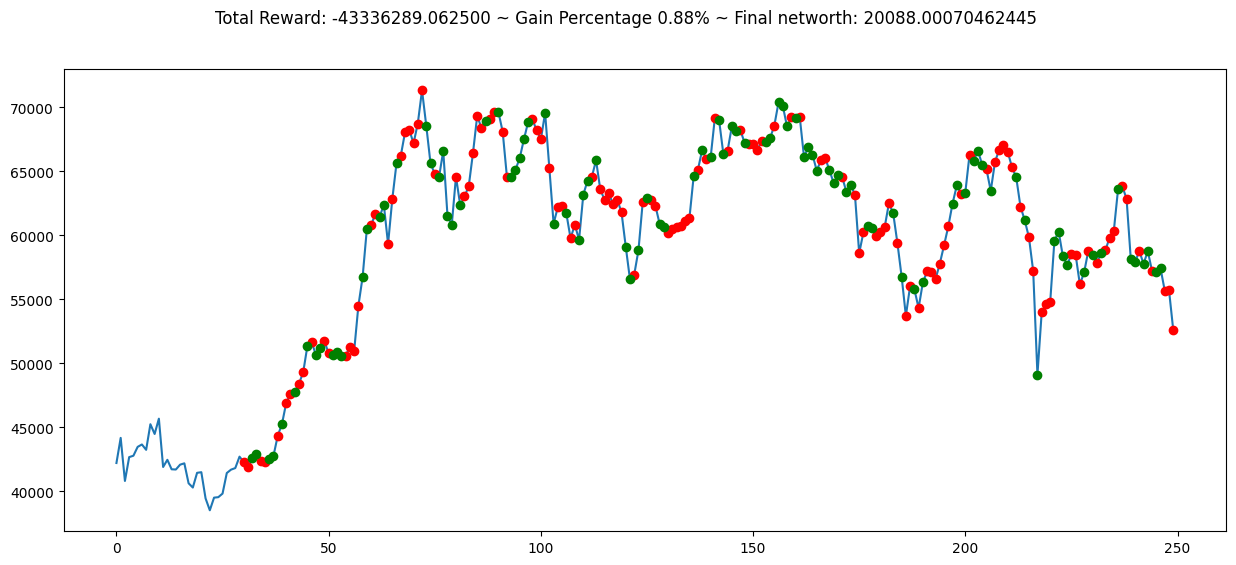

In [91]:
state = new_env.reset()
while True:
    action = new_env.action_space.sample()

    n_state, reward , _ , done, info = new_env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
new_env.render_all()
plt.show()

# 3. Build Environment and Train

In [92]:
env_maker = lambda: new_env
env_d = DummyVecEnv([env_maker])

In [93]:
btc_data_norm = btc_data.copy()
btc_data_norm['Low'] = (btc_data_norm['Low'] - btc_data_norm['Low'].mean()) / btc_data_norm['Low'].std()
btc_data_norm['Volume'] = (btc_data_norm['Volume'] - btc_data_norm['Volume'].mean()) / btc_data_norm['Volume'].std()


In [94]:
train_env = CryptoEnv(df=btc_data_norm, frame_bound=(30,250), window_size=30)

In [42]:
%pip install sb3_contrib

Note: you may need to restart the kernel to use updated packages.


In [95]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from sb3_contrib import RecurrentPPO  # For LSTM-based policies
import numpy as np


# Wrapping the environment with Monitor for better logging and evaluation
def make_env():
    return Monitor(train_env)


vec_env = DummyVecEnv([make_env])

ppo_params = {
    "policy": "MlpLstmPolicy",  # Using LSTM-based policy
    "env": vec_env,
    "learning_rate": 2e-4,  # Slightly higher learning rate
    "n_steps": 4096,  # More steps per update
    "batch_size": 32,  # Smaller batches
    "gae_lambda": 0.95,
    "gamma": 0.99,
    "clip_range": 0.2,
    "ent_coef": 0.02,  # Higher entropy coefficient
    "vf_coef": 0.5,
    "max_grad_norm": 0.1,  # Stricter gradient clipping
    "verbose": 1
}

ppo_model = RecurrentPPO(**ppo_params)

# Add evaluation callback to monitor progress
eval_callback = EvalCallback(
    vec_env,
    best_model_save_path="./logs/",
    log_path="./logs/",
    eval_freq=5000,  # Evaluate the model every 5000 steps
    deterministic=True,
    render=False
)

Using cpu device


In [96]:
ppo_model.learn(total_timesteps=40000, callback=eval_callback)
ppo_model.save("ppo_lstm_crypto_model_copy")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 219      |
|    ep_rew_mean     | 7.21e+03 |
| time/              |          |
|    fps             | 467      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 4096     |
---------------------------------
Eval num_timesteps=5000, episode_reward=16348.56 +/- 0.00
Episode length: 219.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 219           |
|    mean_reward          | 1.63e+04      |
| time/                   |               |
|    total_timesteps      | 5000          |
| train/                  |               |
|    approx_kl            | 2.5964531e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -3.48e-05     |
|    learning_rate        | 0.0002        

# 4. Evaluation

In [97]:
def preprocess_data(coin_to_trade="BTC-USD",  start='2024-01-01', end='2025-01-15'):
  df = yf.download(coin_to_trade, start=start, end=end)
  df.dropna(inplace=True)
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.set_index('Date')
  df.columns = [col[0] for col in df.columns]  # Use the first level of the MultiIndex
  df.head().sort_values('Date', ascending=True, inplace=True)
  df['SMA'] = TA.SMA(df, 12)
  df['RSI'] = TA.RSI(df)
  df['OBV'] = TA.OBV(df)
  df.fillna(0, inplace=True)
  return df

In [150]:

test_envs_profit = []
def testing_env_and_model(model):
  global test_env
  test_btc_data = preprocess_data()
  print(test_btc_data.head())
  test_env = CryptoEnv(df=test_btc_data, window_size=30, frame_bound=(30,250))
  obs, info = test_env.reset()
  while True:
      action, _ = model.predict(obs)
      print(action)
      obs, reward, done, truncated, info = test_env.step(action)
      print(info)
      if done or truncated:
          test_envs_profit.append(test_env._total_profit)
          break

In [ ]:
ppo_modelx = RecurrentPPO.load("../model/ppo_lstm_crypto_model")

In [151]:
for i in range(100):
  testing_env_and_model(ppo_modelx)


[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 162057890.625, 'total_profit': 1.2789010387067254, 'position': <Positions.Short: 0>}
1
{'total_reward': 129579218.75, 'total_profit': 1.213611719953032, 'position': <Positions.Long: 1>}
0
{'total_reward': 131715234.375, 'total_profit': 1.2176863714748103, 'position': <Positions.Short: 0>}
0
{'total_reward': 131715234.375, 'total_profit': 1.2176863714748103, 'position': <Positions.Short: 0>}
1
{'total_reward': 188882929.6875, 'total_profit': 1.3374665033947757, 'position': <Positions.Long: 1>}
0
{'total_reward': 186622187.5, 'total_profit': 1.3322637503829637, 'position': <Positions.Short: 0>}
1
{'total_reward': 177666679.6875, 'total_profit': 1.3119680057514018, 'position': <Positions.Long: 1>}
0
{'total_reward': 167489726.5625, 'total_profit': 1.2892554732200947, 'position': <Positions.Short: 0>}
0
{'total_reward': 167489726.5625, 'total_profit': 1.2892554732200947, 'position': <Positions.Short: 0>}
1
{'total_reward': 172996796.875, 'total_profit': 1.301664223065052


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -20712617.1875, 'total_profit': 0.960776855636514, 'position': <Positions.Short: 0>}
0
{'total_reward': -20712617.1875, 'total_profit': 0.960776855636514, 'position': <Positions.Short: 0>}
0
{'total_reward': -20712617.1875, 'total_profit': 0.960776855636514, 'position': <Positions.Short: 0>}
1
{'total_reward': -51703867.1875, 'total_profit': 0.9171257734205381, 'position': <Positions.Long: 1>}
0
{'total_reward': -58797460.9375, 'total_profit': 0.9075884009889644, 'position': <Positions.Short: 0>}
0
{'total_reward': -58797460.9375, 'total_profit': 0.9075884009889644, 'position': <Positions.Short: 0>}
1
{'total_reward': -36310195.3125, 'total_profit': 0.938864517824183, 'position': <Positions.Long: 1>}
1
{'total_reward': -36310195.3125, 'total_profit': 0.938864517824183, 'position': <Positions.Long: 1>}
1
{'total_reward': -36310195.3125, 'total_profit': 0.938864517824183, 'position': <Positions.Long: 1>}
0
{'total_reward': -65537851.5625, 'total_profit': 0.896812749836

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 251478554.6875, 'total_profit': 1.5390080942950282, 'position': <Positions.Long: 1>}
0
{'total_reward': 220100312.5, 'total_profit': 1.466510821919506, 'position': <Positions.Short: 0>}
0
{'total_reward': 220100312.5, 'total_profit': 1.466510821919506, 'position': <Positions.Short: 0>}
0
{'total_reward': 220100312.5, 'total_profit': 1.466510821919506, 'position': <Positions.Short: 0>}
1
{'total_reward': 183976757.8125, 'total_profit': 1.3875439376228051, 'position': <Positions.Long: 1>}
0
{'total_reward': 178444414.0625, 'total_profit': 1.3761013208908683, 'position': <Positions.Short: 0>}
1
{'total_reward': 190538437.5, 'total_profit': 1.4015786393449274, 'position': <Positions.Long: 1>}
1
{'total_reward': 190538437.5, 'total_profit': 1.4015786393449274, 'position': <Positions.Long: 1>}
0
{'total_reward': 159795937.5, 'total_profit': 1.3356173251512753, 'position': <Positions.Short: 0>}
1
{'total_reward': 170436406.25, 'total_profit': 1.358844611088853, 'position': 


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 49573320.3125, 'total_profit': 1.1019449385486186, 'position': <Positions.Long: 1>}
0
{'total_reward': 52118671.875, 'total_profit': 1.1074802388546936, 'position': <Positions.Short: 0>}
1
{'total_reward': 55763828.125, 'total_profit': 1.1154644027904792, 'position': <Positions.Long: 1>}
1
{'total_reward': 55763828.125, 'total_profit': 1.1154644027904792, 'position': <Positions.Long: 1>}
0
{'total_reward': 63207773.4375, 'total_profit': 1.131886793580992, 'position': <Positions.Short: 0>}
0
{'total_reward': 63207773.4375, 'total_profit': 1.131886793580992, 'position': <Positions.Short: 0>}
0
{'total_reward': 63207773.4375, 'total_profit': 1.131886793580992, 'position': <Positions.Short: 0>}
1
{'total_reward': 8885234.375, 'total_profit': 1.0235176114832205, 'position': <Positions.Long: 1>}
1
{'total_reward': 8885234.375, 'total_profit': 1.0235176114832205, 'position': <Positions.Long: 1>}
0
{'total_reward': 49526250.0, 'total_profit': 1.0968308759903682, 'position': 

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -136007617.1875, 'total_profit': 0.8224840965311052, 'position': <Positions.Short: 0>}
0
{'total_reward': -136007617.1875, 'total_profit': 0.8224840965311052, 'position': <Positions.Short: 0>}
1
{'total_reward': -133144492.1875, 'total_profit': 0.82605109855165, 'position': <Positions.Long: 1>}
1
{'total_reward': -133144492.1875, 'total_profit': 0.82605109855165, 'position': <Positions.Long: 1>}
0
{'total_reward': -152657421.875, 'total_profit': 0.801635608164562, 'position': <Positions.Short: 0>}
0
{'total_reward': -152657421.875, 'total_profit': 0.801635608164562, 'position': <Positions.Short: 0>}
1
{'total_reward': -157466328.125, 'total_profit': 0.7956633053981527, 'position': <Positions.Long: 1>}
0
{'total_reward': -169155859.375, 'total_profit': 0.781253942735199, 'position': <Positions.Short: 0>}
0
{'total_reward': -169155859.375, 'total_profit': 0.781253942735199, 'position': <Positions.Short: 0>}
1
{'total_reward': -167174882.8125, 'total_profit': 0.78370348


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -28259023.4375, 'total_profit': 0.961104002533981, 'position': <Positions.Short: 0>}
1
{'total_reward': -33147773.4375, 'total_profit': 0.9542675721719412, 'position': <Positions.Long: 1>}
0
{'total_reward': -7095351.5625, 'total_profit': 0.9904401226276183, 'position': <Positions.Short: 0>}
0
{'total_reward': -7095351.5625, 'total_profit': 0.9904401226276183, 'position': <Positions.Short: 0>}
1
{'total_reward': 49938632.8125, 'total_profit': 1.076510738271755, 'position': <Positions.Long: 1>}
0
{'total_reward': 41645625.0, 'total_profit': 1.0629080861137186, 'position': <Positions.Short: 0>}
1
{'total_reward': 44206406.25, 'total_profit': 1.0671250797860985, 'position': <Positions.Long: 1>}
1
{'total_reward': 44206406.25, 'total_profit': 1.0671250797860985, 'position': <Positions.Long: 1>}
0
{'total_reward': 14115039.0625, 'total_profit': 1.0173751403635387, 'position': <Positions.Short: 0>}
1
{'total_reward': 21398984.375, 'total_profit': 1.0295619052876974, 'posit

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 86132968.75, 'total_profit': 1.1739436739963292, 'position': <Positions.Long: 1>}
0
{'total_reward': 60146289.0625, 'total_profit': 1.1233413631590188, 'position': <Positions.Short: 0>}
0
{'total_reward': 60146289.0625, 'total_profit': 1.1233413631590188, 'position': <Positions.Short: 0>}
1
{'total_reward': 52306523.4375, 'total_profit': 1.1082801294261833, 'position': <Positions.Long: 1>}
0
{'total_reward': 29193710.9375, 'total_profit': 1.0644726816929506, 'position': <Positions.Short: 0>}
1
{'total_reward': 19709453.125, 'total_profit': 1.0467949841123483, 'position': <Positions.Long: 1>}
0
{'total_reward': 36757578.125, 'total_profit': 1.0780432462292442, 'position': <Positions.Short: 0>}
0
{'total_reward': 36757578.125, 'total_profit': 1.0780432462292442, 'position': <Positions.Short: 0>}
0
{'total_reward': 36757578.125, 'total_profit': 1.0780432462292442, 'position': <Positions.Short: 0>}
1
{'total_reward': 38797070.3125, 'total_profit': 1.081794524897705, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -140376679.6875, 'total_profit': 0.8089355295446486, 'position': <Positions.Short: 0>}
0
{'total_reward': -140376679.6875, 'total_profit': 0.8089355295446486, 'position': <Positions.Short: 0>}
1
{'total_reward': -61166015.625, 'total_profit': 0.9143107177504457, 'position': <Positions.Long: 1>}
0
{'total_reward': -23434687.5, 'total_profit': 0.9710438397809038, 'position': <Positions.Short: 0>}
1
{'total_reward': -1179218.75, 'total_profit': 1.005701692887897, 'position': <Positions.Long: 1>}
0
{'total_reward': 5651992.1875, 'total_profit': 1.016719440463938, 'position': <Positions.Short: 0>}
1
{'total_reward': -2221601.5625, 'total_profit': 1.004177126203924, 'position': <Positions.Long: 1>}
0
{'total_reward': 23668242.1875, 'total_profit': 1.044909815617013, 'position': <Positions.Short: 0>}
0
{'total_reward': 23668242.1875, 'total_profit': 1.044909815617013, 'position': <Positions.Short: 0>}
1
{'total_reward': 3997304.6875, 'total_profit': 1.0148516424932066, 'pos

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -106914179.6875, 'total_profit': 0.8525083189896657, 'position': <Positions.Short: 0>}
1
{'total_reward': -163060039.0625, 'total_profit': 0.7721818644843743, 'position': <Positions.Long: 1>}
1
{'total_reward': -163060039.0625, 'total_profit': 0.7721818644843743, 'position': <Positions.Long: 1>}
1
{'total_reward': -163060039.0625, 'total_profit': 0.7721818644843743, 'position': <Positions.Long: 1>}
1
{'total_reward': -163060039.0625, 'total_profit': 0.7721818644843743, 'position': <Positions.Long: 1>}
1
{'total_reward': -163060039.0625, 'total_profit': 0.7721818644843743, 'position': <Positions.Long: 1>}
0
{'total_reward': -174209882.8125, 'total_profit': 0.7577331000171912, 'position': <Positions.Short: 0>}
0
{'total_reward': -174209882.8125, 'total_profit': 0.7577331000171912, 'position': <Positions.Short: 0>}
0
{'total_reward': -174209882.8125, 'total_profit': 0.7577331000171912, 'position': <Positions.Short: 0>}
1
{'total_reward': -177629453.125, 'total_profit': 


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)
[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -332316562.5, 'total_profit': 0.5543491321900754, 'position': <Positions.Short: 0>}
1
{'total_reward': -330026015.625, 'total_profit': 0.556442786482823, 'position': <Positions.Long: 1>}
1
{'total_reward': -330026015.625, 'total_profit': 0.556442786482823, 'position': <Positions.Long: 1>}
1
{'total_reward': -330026015.625, 'total_profit': 0.556442786482823, 'position': <Positions.Long: 1>}
0
{'total_reward': -330180742.1875, 'total_profit': 0.5563008229497383, 'position': <Positions.Short: 0>}
1
{'total_reward': -331553125.0, 'total_profit': 0.5550445100174329, 'position': <Positions.Long: 1>}
0
{'total_reward': -328013867.1875, 'total_profit': 0.5582771069080646, 'position': <Positions.Short: 0>}
0
{'total_reward': -328013867.1875, 'total_profit': 0.5582771069080646, 'position': <Positions.Short: 0>}
1
{'total_reward': -362906757.8125, 'total_profit': 0.5281285497800507, 'position': <Positions.Long: 1>}
0
{'total_reward': -357844140.625, 'total_profit': 0.5322665852


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625, 'total_profit': 1.0029831357811108, 'position': <Positions.Long: 1>}
0
{'total_reward': 4335078.125, 'total_profit': 1.0102014379604143, 'position': <Positions.Short: 0>}
1
{'total_reward': 9494843.75, 'total_profit': 1.0225021347973138, 'position': <Positions.Long: 1>}
1
{'total_reward': 9494843.75, 'total_profit': 1.0225021347973138, 'position': <Positions.Long: 1>}
0
{'total_reward': 11036718.75, 'total_profit': 1.0262226626106665, 'position': <Positions.Short: 0>}
0
{'total_reward': 11036718.75, 'total_profit': 1.0262226626106665, 'position': <Positions.Short: 0>}
0
{'total_reward': 11036718.75, 'total_profit': 1.0262226626106665, 'position': <Positions.Short: 0>}
1
{'total_reward': -16281328.125, 'total_profit': 0.9642829998582596, 'position': <Positions.Long: 1>}
0
{'total_reward': 163632.8125, 'total_profit': 0.9993190241601463, 'position': <Positions.Short: 0>}
0
{'to

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 114683945.3125, 'total_profit': 1.1895658560505382, 'position': <Positions.Long: 1>}
0
{'total_reward': 132258750.0, 'total_profit': 1.2268727290984274, 'position': <Positions.Short: 0>}
0
{'total_reward': 132258750.0, 'total_profit': 1.2268727290984274, 'position': <Positions.Short: 0>}
0
{'total_reward': 132258750.0, 'total_profit': 1.2268727290984274, 'position': <Positions.Short: 0>}
1
{'total_reward': 85343476.5625, 'total_profit': 1.1347604803076827, 'position': <Positions.Long: 1>}
1
{'total_reward': 85343476.5625, 'total_profit': 1.1347604803076827, 'position': <Positions.Long: 1>}
1
{'total_reward': 85343476.5625, 'total_profit': 1.1347604803076827, 'position': <Positions.Long: 1>}
1
{'total_reward': 85343476.5625, 'total_profit': 1.1347604803076827, 'position': <Positions.Long: 1>}
1
{'total_reward': 85343476.5625, 'total_profit': 1.1347604803076827, 'position': <Positions.Long: 1>}
0
{'total_reward': 118886757.8125, 'total_profit': 1.1956739446104638, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 250131718.75, 'total_profit': 1.5034128480947353, 'position': <Positions.Long: 1>}
0
{'total_reward': 238310820.3125, 'total_profit': 1.4741991733875512, 'position': <Positions.Short: 0>}
0
{'total_reward': 238310820.3125, 'total_profit': 1.4741991733875512, 'position': <Positions.Short: 0>}
0
{'total_reward': 238310820.3125, 'total_profit': 1.4741991733875512, 'position': <Positions.Short: 0>}
1
{'total_reward': 189342929.6875, 'total_profit': 1.3623626682312577, 'position': <Positions.Long: 1>}
0
{'total_reward': 202509804.6875, 'total_profit': 1.39015284753147, 'position': <Positions.Short: 0>}
0
{'total_reward': 202509804.6875, 'total_profit': 1.39015284753147, 'position': <Positions.Short: 0>}
0
{'total_reward': 202509804.6875, 'total_profit': 1.39015284753147, 'position': <Positions.Short: 0>}
1
{'total_reward': 227934492.1875, 'total_profit': 1.4459691122772682, 'position': <Positions.Long: 1>}
1
{'total_reward': 227934492.1875, 'total_profit': 1.4459691122772

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 77393632.8125, 'total_profit': 1.102491571878297, 'position': <Positions.Long: 1>}
0
{'total_reward': 111044960.9375, 'total_profit': 1.1611517339336375, 'position': <Positions.Short: 0>}
0
{'total_reward': 111044960.9375, 'total_profit': 1.1611517339336375, 'position': <Positions.Short: 0>}
0
{'total_reward': 111044960.9375, 'total_profit': 1.1611517339336375, 'position': <Positions.Short: 0>}
1
{'total_reward': 142423203.125, 'total_profit': 1.2185535040205975, 'position': <Positions.Long: 1>}
1
{'total_reward': 142423203.125, 'total_profit': 1.2185535040205975, 'position': <Positions.Long: 1>}
0
{'total_reward': 174740664.0625, 'total_profit': 1.2805960392132913, 'position': <Positions.Short: 0>}
0
{'total_reward': 174740664.0625, 'total_profit': 1.2805960392132913, 'position': <Positions.Short: 0>}
1
{'total_reward': 176466914.0625, 'total_profit': 1.2839186589193716, 'position': <Positions.Long: 1>}
0
{'total_reward': 164372890.625, 'total_profit': 1.26058010358


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -14479375.0, 'total_profit': 0.9918516444159299, 'position': <Positions.Long: 1>}
0
{'total_reward': 11133828.125, 'total_profit': 1.0330149230549484, 'position': <Positions.Short: 0>}
0
{'total_reward': 11133828.125, 'total_profit': 1.0330149230549484, 'position': <Positions.Short: 0>}
0
{'total_reward': 11133828.125, 'total_profit': 1.0330149230549484, 'position': <Positions.Short: 0>}
0
{'total_reward': 11133828.125, 'total_profit': 1.0330149230549484, 'position': <Positions.Short: 0>}
0
{'total_reward': 11133828.125, 'total_profit': 1.0330149230549484, 'position': <Positions.Short: 0>}
1
{'total_reward': 20687070.3125, 'total_profit': 1.0485996748769142, 'position': <Positions.Long: 1>}
1
{'total_reward': 20687070.3125, 'total_profit': 1.0485996748769142, 'position': <Positions.Long: 1>}
0
{'total_reward': 15399062.5, 'total_profit': 1.0398428896704819, 'position': <Positions.Short: 0>}
1
{'total_reward': 25380468.75, 'total_profit': 1.0566387703016384, 'position

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -11478359.375, 'total_profit': 1.0031966473837997, 'position': <Positions.Long: 1>}
1
{'total_reward': -11478359.375, 'total_profit': 1.0031966473837997, 'position': <Positions.Long: 1>}
0
{'total_reward': -52111679.6875, 'total_profit': 0.9383382543716081, 'position': <Positions.Short: 0>}
1
{'total_reward': -41934726.5625, 'total_profit': 0.9548687449492432, 'position': <Positions.Long: 1>}
1
{'total_reward': -41934726.5625, 'total_profit': 0.9548687449492432, 'position': <Positions.Long: 1>}
0
{'total_reward': -47441796.875, 'total_profit': 0.9457659824789747, 'position': <Positions.Short: 0>}
1
{'total_reward': -46623828.125, 'total_profit': 0.9471199516244468, 'position': <Positions.Long: 1>}
1
{'total_reward': -46623828.125, 'total_profit': 0.9471199516244468, 'position': <Positions.Long: 1>}
0
{'total_reward': -61252460.9375, 'total_profit': 0.9228706758396433, 'position': <Positions.Short: 0>}
1
{'total_reward': -61645351.5625, 'total_profit': 0.9222198518588


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)
[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -346737656.25, 'total_profit': 0.6015561707847555, 'position': <Positions.Short: 0>}
0
{'total_reward': -346737656.25, 'total_profit': 0.6015561707847555, 'position': <Positions.Short: 0>}
0
{'total_reward': -346737656.25, 'total_profit': 0.6015561707847555, 'position': <Positions.Short: 0>}
1
{'total_reward': -400068554.6875, 'total_profit': 0.553431585587096, 'position': <Positions.Long: 1>}
0
{'total_reward': -407331757.8125, 'total_profit': 0.547401767647437, 'position': <Positions.Short: 0>}
1
{'total_reward': -408821679.6875, 'total_profit': 0.5461676403147485, 'position': <Positions.Long: 1>}
0
{'total_reward': -377772148.4375, 'total_profit': 0.571828451186446, 'position': <Positions.Short: 0>}
0
{'total_reward': -377772148.4375, 'total_profit': 0.571828451186446, 'position': <Positions.Short: 0>}
0
{'total_reward': -377772148.4375, 'total_profit': 0.571828451186446, 'position': <Positions.Short: 0>}
0
{'total_reward': -377772148.4375, 'total_profit': 0.57182


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 12308515.625, 'total_profit': 1.0296329989248671, 'position': <Positions.Long: 1>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
1
{'total_reward': 8248906.25, 'total_profit': 1.0198943963410414, 'position': <Positions.Long: 1>}
0
{'total_reward': 10890937.5, 'total_profit': 1.0262698879112622, 'position': <Positions.Short: 0>}
1
{'total_reward': 8421562.5, 'total_profit': 1.020345418982562, 'position': <Positions.Long: 1>}
0
{'total_reward': 23983242.1875, 'total_profit': 1.0574650689489635, 'position': <Positions.Short: 0>}
1
{'total_reward': 14696250.0, 'total_profit': 1.0357671145351992, 'position': <Positions.Long: 1>}
1
{'total_reward': 14696250.0, 'total_profit': 1.0357671145351992, 'position': <Positions.

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 83895898.4375, 'total_profit': 1.15337147105244, 'position': <Positions.Long: 1>}
0
{'total_reward': 77396679.6875, 'total_profit': 1.1416398965115115, 'position': <Positions.Short: 0>}
1
{'total_reward': 76564882.8125, 'total_profit': 1.140140408490663, 'position': <Positions.Long: 1>}
0
{'total_reward': 106267617.1875, 'total_profit': 1.1936152785554281, 'position': <Positions.Short: 0>}
0
{'total_reward': 106267617.1875, 'total_profit': 1.1936152785554281, 'position': <Positions.Short: 0>}
0
{'total_reward': 106267617.1875, 'total_profit': 1.1936152785554281, 'position': <Positions.Short: 0>}
0
{'total_reward': 106267617.1875, 'total_profit': 1.1936152785554281, 'position': <Positions.Short: 0>}
1
{'total_reward': 117793828.125, 'total_profit': 1.2147334554828932, 'position': <Positions.Long: 1>}
1
{'total_reward': 117793828.125, 'total_profit': 1.2147334554828932, 'position': <Positions.Long: 1>}
0
{'total_reward': 123761523.4375, 'total_profit': 1.22586083807715


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -164697773.4375, 'total_profit': 0.7896175231307428, 'position': <Positions.Short: 0>}
1
{'total_reward': -121340468.75, 'total_profit': 0.8458161243818367, 'position': <Positions.Long: 1>}
0
{'total_reward': -108473007.8125, 'total_profit': 0.8636816253927233, 'position': <Positions.Short: 0>}
0
{'total_reward': -108473007.8125, 'total_profit': 0.8636816253927233, 'position': <Positions.Short: 0>}
1
{'total_reward': -103578515.625, 'total_profit': 0.8705311503429657, 'position': <Positions.Long: 1>}
1
{'total_reward': -103578515.625, 'total_profit': 0.8705311503429657, 'position': <Positions.Long: 1>}
0
{'total_reward': -112407734.375, 'total_profit': 0.8580772284117256, 'position': <Positions.Short: 0>}
0
{'total_reward': -112407734.375, 'total_profit': 0.8580772284117256, 'position': <Positions.Short: 0>}
1
{'total_reward': -135796953.125, 'total_profit': 0.8263074083172823, 'position': <Positions.Long: 1>}
0
{'total_reward': -124743750.0, 'total_profit': 0.840765

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -334699882.8125, 'total_profit': 0.5752215488229904, 'position': <Positions.Long: 1>}
0
{'total_reward': -349972929.6875, 'total_profit': 0.5599926440556956, 'position': <Positions.Short: 0>}
1
{'total_reward': -359457187.5, 'total_profit': 0.5506928463443684, 'position': <Positions.Long: 1>}
0
{'total_reward': -342409062.5, 'total_profit': 0.5671317810638162, 'position': <Positions.Short: 0>}
1
{'total_reward': -338714765.625, 'total_profit': 0.5707165822305174, 'position': <Positions.Long: 1>}
1
{'total_reward': -338714765.625, 'total_profit': 0.5707165822305174, 'position': <Positions.Long: 1>}
1
{'total_reward': -338714765.625, 'total_profit': 0.5707165822305174, 'position': <Positions.Long: 1>}
1
{'total_reward': -338714765.625, 'total_profit': 0.5707165822305174, 'position': <Positions.Long: 1>}
0
{'total_reward': -325016250.0, 'total_profit': 0.5840931148463762, 'position': <Positions.Short: 0>}
1
{'total_reward': -330584218.75, 'total_profit': 0.5787061619091


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)
[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -167327695.3125, 'total_profit': 0.772607163004715, 'position': <Positions.Long: 1>}
1
{'total_reward': -167327695.3125, 'total_profit': 0.772607163004715, 'position': <Positions.Long: 1>}
1
{'total_reward': -167327695.3125, 'total_profit': 0.772607163004715, 'position': <Positions.Long: 1>}
0
{'total_reward': -164480664.0625, 'total_profit': 0.7758852338009358, 'position': <Positions.Short: 0>}
0
{'total_reward': -164480664.0625, 'total_profit': 0.7758852338009358, 'position': <Positions.Short: 0>}
0
{'total_reward': -164480664.0625, 'total_profit': 0.7758852338009358, 'position': <Positions.Short: 0>}
0
{'total_reward': -164480664.0625, 'total_profit': 0.7758852338009358, 'position': <Positions.Short: 0>}
1
{'total_reward': -194525820.3125, 'total_profit': 0.7427678023972794, 'position': <Positions.Long: 1>}
0
{'total_reward': -197241679.6875, 'total_profit': 0.7399020050484171, 'position': <Positions.Short: 0>}
1
{'total_reward': -181123007.8125, 'total_profit': 0


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 8898007.8125, 'total_profit': 0.9805248348613722, 'position': <Positions.Short: 0>}
1
{'total_reward': -3593164.0625, 'total_profit': 0.9626615352511239, 'position': <Positions.Long: 1>}
1
{'total_reward': -3593164.0625, 'total_profit': 0.9626615352511239, 'position': <Positions.Long: 1>}
1
{'total_reward': -3593164.0625, 'total_profit': 0.9626615352511239, 'position': <Positions.Long: 1>}
1
{'total_reward': -3593164.0625, 'total_profit': 0.9626615352511239, 'position': <Positions.Long: 1>}
0
{'total_reward': 2867851.5625, 'total_profit': 0.9717329287218155, 'position': <Positions.Short: 0>}
0
{'total_reward': 2867851.5625, 'total_profit': 0.9717329287218155, 'position': <Positions.Short: 0>}
1
{'total_reward': 2651054.6875, 'total_profit': 0.9714286325961352, 'position': <Positions.Long: 1>}
1
{'total_reward': 2651054.6875, 'total_profit': 0.9714286325961352, 'position': <Positions.Long: 1>}
0
{'total_reward': -20648632.8125, 'total_profit': 0.9387358769921291, 'pos


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 86951640.625, 'total_profit': 1.0991029831485297, 'position': <Positions.Long: 1>}
1
{'total_reward': 86951640.625, 'total_profit': 1.0991029831485297, 'position': <Positions.Long: 1>}
1
{'total_reward': 86951640.625, 'total_profit': 1.0991029831485297, 'position': <Positions.Long: 1>}
0
{'total_reward': 140627539.0625, 'total_profit': 1.2023854506814433, 'position': <Positions.Short: 0>}
1
{'total_reward': 126546367.1875, 'total_profit': 1.1758877402978025, 'position': <Positions.Long: 1>}
1
{'total_reward': 126546367.1875, 'total_profit': 1.1758877402978025, 'position': <Positions.Long: 1>}
0
{'total_reward': 120878945.3125, 'total_profit': 1.1654579067144277, 'position': <Positions.Short: 0>}
0
{'total_reward': 120878945.3125, 'total_profit': 1.1654579067144277, 'position': <Positions.Short: 0>}
1
{'total_reward': 95749414.0625, 'total_profit': 1.1209767513268585, 'position': <Positions.Long: 1>}
1
{'total_reward': 95749414.0625, 'total_profit': 1.1209767513268585


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 12308515.625, 'total_profit': 1.0296329989248671, 'position': <Positions.Long: 1>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
1
{'total_reward': 8248906.25, 'total_profit': 1.0198943963410414, 'position': <Positions.Long: 1>}
1
{'total_reward': 8248906.25, 'total_profit': 1.0198943963410414, 'position': <Positions.Long: 1>}
0
{'total_reward': 13360312.5, 'total_profit': 1.032228749061295, 'position': <Positions.Short: 0>}
1
{'total_reward': -2201367.1875, 'total_profit': 0.9959949428681406, 'position': <Positions.Long: 1>}
0
{'total_reward': 7085625.0, 'total_profit': 1.0168597091414042, 'position': <Positions.Short: 0>}
0
{'total_reward': 7085625.0, 'total_profit': 1.0168597091414042, 'position': <Positions.S

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -33656093.75, 'total_profit': 0.9111075221072451, 'position': <Positions.Long: 1>}
0
{'total_reward': -11710625.0, 'total_profit': 0.9442656630636651, 'position': <Positions.Short: 0>}
0
{'total_reward': -11710625.0, 'total_profit': 0.9442656630636651, 'position': <Positions.Short: 0>}
1
{'total_reward': 19050625.0, 'total_profit': 0.9931500270720105, 'position': <Positions.Long: 1>}
1
{'total_reward': 19050625.0, 'total_profit': 0.9931500270720105, 'position': <Positions.Long: 1>}
0
{'total_reward': -37969492.1875, 'total_profit': 0.8978452165799237, 'position': <Positions.Short: 0>}
1
{'total_reward': -61185351.5625, 'total_profit': 0.8606492182361658, 'position': <Positions.Long: 1>}
1
{'total_reward': -61185351.5625, 'total_profit': 0.8606492182361658, 'position': <Positions.Long: 1>}
0
{'total_reward': -78364765.625, 'total_profit': 0.8342649819526204, 'position': <Positions.Short: 0>}
1
{'total_reward': -98323320.3125, 'total_profit': 0.8046988425513086, 'posit


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 72479726.5625, 'total_profit': 1.1128426804305174, 'position': <Positions.Short: 0>}
1
{'total_reward': 64606132.8125, 'total_profit': 1.099114583903174, 'position': <Positions.Long: 1>}
0
{'total_reward': 90495976.5625, 'total_profit': 1.1436982452984175, 'position': <Positions.Short: 0>}
1
{'total_reward': 61288242.1875, 'total_profit': 1.095519772092456, 'position': <Positions.Long: 1>}
1
{'total_reward': 61288242.1875, 'total_profit': 1.095519772092456, 'position': <Positions.Long: 1>}
0
{'total_reward': 56887226.5625, 'total_profit': 1.0885660538450859, 'position': <Positions.Short: 0>}
1
{'total_reward': 55075742.1875, 'total_profit': 1.0857113649089896, 'position': <Positions.Long: 1>}
1
{'total_reward': 55075742.1875, 'total_profit': 1.0857113649089896, 'position': <Positions.Long: 1>}
1
{'total_reward': 55075742.1875, 'total_profit': 1.0857113649089896, 'position': <Positions.Long: 1>}
0
{'total_reward': 45416132.8125, 'total_profit': 1.0705288828586181, 'po

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 32435507.8125, 'total_profit': 1.0412121387648203, 'position': <Positions.Short: 0>}
1
{'total_reward': 22517421.875, 'total_profit': 1.0239475884692393, 'position': <Positions.Long: 1>}
1
{'total_reward': 22517421.875, 'total_profit': 1.0239475884692393, 'position': <Positions.Long: 1>}
1
{'total_reward': 22517421.875, 'total_profit': 1.0239475884692393, 'position': <Positions.Long: 1>}
0
{'total_reward': 62700078.125, 'total_profit': 1.0927342744843496, 'position': <Positions.Short: 0>}
0
{'total_reward': 62700078.125, 'total_profit': 1.0927342744843496, 'position': <Positions.Short: 0>}
0
{'total_reward': 62700078.125, 'total_profit': 1.0927342744843496, 'position': <Positions.Short: 0>}
1
{'total_reward': 122128515.625, 'total_profit': 1.2049103484042385, 'position': <Positions.Long: 1>}
1
{'total_reward': 122128515.625, 'total_profit': 1.2049103484042385, 'position': <Positions.Long: 1>}
1
{'total_reward': 122128515.625, 'total_profit': 1.2049103484042385, 'posi


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 69934882.8125, 'total_profit': 1.1014701149963042, 'position': <Positions.Short: 0>}
1
{'total_reward': 105175898.4375, 'total_profit': 1.1615707024013258, 'position': <Positions.Long: 1>}
0
{'total_reward': 104908945.3125, 'total_profit': 1.1610905897407529, 'position': <Positions.Short: 0>}
0
{'total_reward': 104908945.3125, 'total_profit': 1.1610905897407529, 'position': <Positions.Short: 0>}
0
{'total_reward': 104908945.3125, 'total_profit': 1.1610905897407529, 'position': <Positions.Short: 0>}
0
{'total_reward': 104908945.3125, 'total_profit': 1.1610905897407529, 'position': <Positions.Short: 0>}
0
{'total_reward': 104908945.3125, 'total_profit': 1.1610905897407529, 'position': <Positions.Short: 0>}
1
{'total_reward': 59865507.8125, 'total_profit': 1.0853646956491165, 'position': <Positions.Long: 1>}
0
{'total_reward': 51352304.6875, 'total_profit': 1.0719859440952029, 'position': <Positions.Short: 0>}
1
{'total_reward': 58445898.4375, 'total_profit': 1.08325087

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -28881250.0, 'total_profit': 0.9339331237334845, 'position': <Positions.Short: 0>}
1
{'total_reward': -34449218.75, 'total_profit': 0.9253196789655086, 'position': <Positions.Long: 1>}
1
{'total_reward': -34449218.75, 'total_profit': 0.9253196789655086, 'position': <Positions.Long: 1>}
0
{'total_reward': 165468.75, 'total_profit': 0.9783734486065093, 'position': <Positions.Short: 0>}
0
{'total_reward': 165468.75, 'total_profit': 0.9783734486065093, 'position': <Positions.Short: 0>}
0
{'total_reward': 165468.75, 'total_profit': 0.9783734486065093, 'position': <Positions.Short: 0>}
0
{'total_reward': 165468.75, 'total_profit': 0.9783734486065093, 'position': <Positions.Short: 0>}
1
{'total_reward': 50638398.4375, 'total_profit': 1.0623750493760569, 'position': <Positions.Long: 1>}
1
{'total_reward': 50638398.4375, 'total_profit': 1.0623750493760569, 'position': <Positions.Long: 1>}
1
{'total_reward': 50638398.4375, 'total_profit': 1.0623750493760569, 'position': <Posit


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 192117695.3125, 'total_profit': 1.3505473173430802, 'position': <Positions.Short: 0>}
1
{'total_reward': 179539687.5, 'total_profit': 1.3238336309207723, 'position': <Positions.Long: 1>}
1
{'total_reward': 179539687.5, 'total_profit': 1.3238336309207723, 'position': <Positions.Long: 1>}
1
{'total_reward': 179539687.5, 'total_profit': 1.3238336309207723, 'position': <Positions.Long: 1>}
0
{'total_reward': 167888164.0625, 'total_profit': 1.2995771223224384, 'position': <Positions.Short: 0>}
0
{'total_reward': 167888164.0625, 'total_profit': 1.2995771223224384, 'position': <Positions.Short: 0>}
0
{'total_reward': 167888164.0625, 'total_profit': 1.2995771223224384, 'position': <Positions.Short: 0>}
1
{'total_reward': 200934687.5, 'total_profit': 1.372219973630866, 'position': <Positions.Long: 1>}
0
{'total_reward': 175286953.125, 'total_profit': 1.3126896996582826, 'position': <Positions.Short: 0>}
0
{'total_reward': 175286953.125, 'total_profit': 1.3126896996582826, 'po

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -23693359.375, 'total_profit': 0.9847649764757507, 'position': <Positions.Short: 0>}
1
{'total_reward': -21712382.8125, 'total_profit': 0.9878526130364828, 'position': <Positions.Long: 1>}
0
{'total_reward': -67503359.375, 'total_profit': 0.9162569050814051, 'position': <Positions.Short: 0>}
1
{'total_reward': -83883867.1875, 'total_profit': 0.8913418678498202, 'position': <Positions.Long: 1>}
0
{'total_reward': -79329492.1875, 'total_profit': 0.8980807776981561, 'position': <Positions.Short: 0>}
1
{'total_reward': -78230937.5, 'total_profit': 0.8997092051091716, 'position': <Positions.Long: 1>}
0
{'total_reward': -84230234.375, 'total_profit': 0.8908000762147988, 'position': <Positions.Short: 0>}
1
{'total_reward': -87385859.375, 'total_profit': 0.886138403436943, 'position': <Positions.Long: 1>}
1
{'total_reward': -87385859.375, 'total_profit': 0.886138403436943, 'position': <Positions.Long: 1>}
0
{'total_reward': -65440390.625, 'total_profit': 0.9183878376421416, 


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -8054296.875, 'total_profit': 0.9812824375576564, 'position': <Positions.Short: 0>}
0
{'total_reward': -8054296.875, 'total_profit': 0.9812824375576564, 'position': <Positions.Short: 0>}
0
{'total_reward': -8054296.875, 'total_profit': 0.9812824375576564, 'position': <Positions.Short: 0>}
0
{'total_reward': -8054296.875, 'total_profit': 0.9812824375576564, 'position': <Positions.Short: 0>}
1
{'total_reward': -61580195.3125, 'total_profit': 0.8709781787341073, 'position': <Positions.Long: 1>}
0
{'total_reward': -60296640.625, 'total_profit': 0.8733259452319724, 'position': <Positions.Short: 0>}
0
{'total_reward': -60296640.625, 'total_profit': 0.8733259452319724, 'position': <Positions.Short: 0>}
1
{'total_reward': -75807343.75, 'total_profit': 0.8458477046844987, 'position': <Positions.Long: 1>}
0
{'total_reward': -55059375.0, 'total_profit': 0.8814475971793859, 'position': <Positions.Short: 0>}
1
{'total_reward': -57756757.8125, 'total_profit': 0.8768435280530569, '

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 45315117.1875, 'total_profit': 1.0682922921549658, 'position': <Positions.Short: 0>}
1
{'total_reward': 9494140.625, 'total_profit': 1.0027086632191107, 'position': <Positions.Long: 1>}
0
{'total_reward': 2894882.8125, 'total_profit': 0.9913680131269539, 'position': <Positions.Short: 0>}
0
{'total_reward': 2894882.8125, 'total_profit': 0.9913680131269539, 'position': <Positions.Short: 0>}
0
{'total_reward': 2894882.8125, 'total_profit': 0.9913680131269539, 'position': <Positions.Short: 0>}
0
{'total_reward': 2894882.8125, 'total_profit': 0.9913680131269539, 'position': <Positions.Short: 0>}
1
{'total_reward': 8683671.875, 'total_profit': 1.0014167180377576, 'position': <Positions.Long: 1>}
1
{'total_reward': 8683671.875, 'total_profit': 1.0014167180377576, 'position': <Positions.Long: 1>}
1
{'total_reward': 8683671.875, 'total_profit': 1.0014167180377576, 'position': <Positions.Long: 1>}
1
{'total_reward': 8683671.875, 'total_profit': 1.0014167180377576, 'position': 


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -8543554.6875, 'total_profit': 0.9583011497431048, 'position': <Positions.Short: 0>}
1
{'total_reward': -62456601.5625, 'total_profit': 0.8825904882160588, 'position': <Positions.Long: 1>}
1
{'total_reward': -62456601.5625, 'total_profit': 0.8825904882160588, 'position': <Positions.Long: 1>}
1
{'total_reward': -62456601.5625, 'total_profit': 0.8825904882160588, 'position': <Positions.Long: 1>}
0
{'total_reward': -31515429.6875, 'total_profit': 0.9226086457814419, 'position': <Positions.Short: 0>}
0
{'total_reward': -31515429.6875, 'total_profit': 0.9226086457814419, 'position': <Positions.Short: 0>}
1
{'total_reward': 25518554.6875, 'total_profit': 1.0027846123308786, 'position': <Positions.Long: 1>}
0
{'total_reward': 17225546.875, 'total_profit': 0.9901135540812721, 'position': <Positions.Short: 0>}
1
{'total_reward': 19786328.125, 'total_profit': 0.9940417418964239, 'position': <Positions.Long: 1>}
1
{'total_reward': 19786328.125, 'total_profit': 0.994041741896423

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 78040156.25, 'total_profit': 1.1051810734817804, 'position': <Positions.Short: 0>}
0
{'total_reward': 78040156.25, 'total_profit': 1.1051810734817804, 'position': <Positions.Short: 0>}
1
{'total_reward': 37857500.0, 'total_profit': 1.0356108620765845, 'position': <Positions.Long: 1>}
0
{'total_reward': 28017890.625, 'total_profit': 1.0196474473549748, 'position': <Positions.Short: 0>}
0
{'total_reward': 28017890.625, 'total_profit': 1.0196474473549748, 'position': <Positions.Short: 0>}
0
{'total_reward': 28017890.625, 'total_profit': 1.0196474473549748, 'position': <Positions.Short: 0>}
1
{'total_reward': 68651210.9375, 'total_profit': 1.090125960261746, 'position': <Positions.Long: 1>}
1
{'total_reward': 68651210.9375, 'total_profit': 1.090125960261746, 'position': <Positions.Long: 1>}
0
{'total_reward': 68476796.875, 'total_profit': 1.0898025229893404, 'position': <Positions.Short: 0>}
0
{'total_reward': 68476796.875, 'total_profit': 1.0898025229893404, 'position':


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -93375117.1875, 'total_profit': 0.8681487560363735, 'position': <Positions.Short: 0>}
1
{'total_reward': -101567031.25, 'total_profit': 0.8567434793414918, 'position': <Positions.Long: 1>}
1
{'total_reward': -101567031.25, 'total_profit': 0.8567434793414918, 'position': <Positions.Long: 1>}
1
{'total_reward': -101567031.25, 'total_profit': 0.8567434793414918, 'position': <Positions.Long: 1>}
0
{'total_reward': -60972382.8125, 'total_profit': 0.9125192644337947, 'position': <Positions.Short: 0>}
1
{'total_reward': -90180117.1875, 'total_profit': 0.8740792431150805, 'position': <Positions.Long: 1>}
0
{'total_reward': -99716914.0625, 'total_profit': 0.8620566779546657, 'position': <Positions.Short: 0>}
1
{'total_reward': -104852695.3125, 'total_profit': 0.8556305157130055, 'position': <Positions.Long: 1>}
0
{'total_reward': -103041210.9375, 'total_profit': 0.8578802396678881, 'position': <Positions.Short: 0>}
0
{'total_reward': -103041210.9375, 'total_profit': 0.8578802

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 31385351.5625, 'total_profit': 1.0435143136717209, 'position': <Positions.Short: 0>}
1
{'total_reward': 77176328.125, 'total_profit': 1.125053820181702, 'position': <Positions.Long: 1>}
0
{'total_reward': 93556835.9375, 'total_profit': 1.1565016276028073, 'position': <Positions.Short: 0>}
0
{'total_reward': 93556835.9375, 'total_profit': 1.1565016276028073, 'position': <Positions.Short: 0>}
1
{'total_reward': 90101015.625, 'total_profit': 1.1499048736499653, 'position': <Positions.Long: 1>}
0
{'total_reward': 84101718.75, 'total_profit': 1.1385182493079682, 'position': <Positions.Short: 0>}
1
{'total_reward': 80946093.75, 'total_profit': 1.1325602350782844, 'position': <Positions.Long: 1>}
0
{'total_reward': 84265937.5, 'total_profit': 1.138795491230462, 'position': <Positions.Short: 0>}
1
{'total_reward': 65640312.5, 'total_profit': 1.104855804036298, 'position': <Positions.Long: 1>}
1
{'total_reward': 65640312.5, 'total_profit': 1.104855804036298, 'position': <Posi


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -204700351.5625, 'total_profit': 0.7234933737669856, 'position': <Positions.Short: 0>}
1
{'total_reward': -123804687.5, 'total_profit': 0.8426423952352802, 'position': <Positions.Long: 1>}
1
{'total_reward': -123804687.5, 'total_profit': 0.8426423952352802, 'position': <Positions.Long: 1>}
0
{'total_reward': -68811992.1875, 'total_profit': 0.9369787263051951, 'position': <Positions.Short: 0>}
1
{'total_reward': -70274179.6875, 'total_profit': 0.9344771318548821, 'position': <Positions.Long: 1>}
0
{'total_reward': -22062851.5625, 'total_profit': 1.0167394536212184, 'position': <Positions.Short: 0>}
1
{'total_reward': -29059921.875, 'total_profit': 1.0049390096478135, 'position': <Positions.Long: 1>}
0
{'total_reward': -48447343.75, 'total_profit': 0.972621932155888, 'position': <Positions.Short: 0>}
1
{'total_reward': -41848085.9375, 'total_profit': 0.9837481282531781, 'position': <Positions.Long: 1>}
1
{'total_reward': -41848085.9375, 'total_profit': 0.98374812825317


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -65203710.9375, 'total_profit': 0.8744349240020843, 'position': <Positions.Long: 1>}
1
{'total_reward': -65203710.9375, 'total_profit': 0.8744349240020843, 'position': <Positions.Long: 1>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
0
{'total_reward': -7129765.625, 'total_profit': 0.9741420810852867, 'position': <Positions.Short: 0>}
1
{'total_reward': -32984609.375, 'total_profit': 0.9316865279148208, 'position': <Positions.Long: 1>}
1
{'total_reward': -32984609.375, 'total_profit': 0.9316865279148208, '

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -266234570.3125, 'total_profit': 0.668633053990752, 'position': <Positions.Long: 1>}
0
{'total_reward': -247973867.1875, 'total_profit': 0.686440640497865, 'position': <Positions.Short: 0>}
1
{'total_reward': -245258007.8125, 'total_profit': 0.6890993647611173, 'position': <Positions.Long: 1>}
0
{'total_reward': -261376679.6875, 'total_profit': 0.6732586528053514, 'position': <Positions.Short: 0>}
0
{'total_reward': -261376679.6875, 'total_profit': 0.6732586528053514, 'position': <Positions.Short: 0>}
1
{'total_reward': -267912539.0625, 'total_profit': 0.6668962002109039, 'position': <Positions.Long: 1>}
0
{'total_reward': -267196757.8125, 'total_profit': 0.6675864025988969, 'position': <Positions.Short: 0>}
0
{'total_reward': -267196757.8125, 'total_profit': 0.6675864025988969, 'position': <Positions.Short: 0>}
0
{'total_reward': -267196757.8125, 'total_profit': 0.6675864025988969, 'position': <Positions.Short: 0>}
1
{'total_reward': -237918164.0625, 'total_profit':


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 38136953.125, 'total_profit': 1.1020743004039661, 'position': <Positions.Short: 0>}
1
{'total_reward': 44317851.5625, 'total_profit': 1.1127294416843871, 'position': <Positions.Long: 1>}
0
{'total_reward': 36828242.1875, 'total_profit': 1.0996933963721105, 'position': <Positions.Short: 0>}
1
{'total_reward': 82619218.75, 'total_profit': 1.1856226986132636, 'position': <Positions.Long: 1>}
1
{'total_reward': 82619218.75, 'total_profit': 1.1856226986132636, 'position': <Positions.Long: 1>}
0
{'total_reward': 103554101.5625, 'total_profit': 1.2279779016693877, 'position': <Positions.Short: 0>}
1
{'total_reward': 104652656.25, 'total_profit': 1.2302045085903432, 'position': <Positions.Long: 1>}
1
{'total_reward': 104652656.25, 'total_profit': 1.2302045085903432, 'position': <Positions.Long: 1>}
0
{'total_reward': 101808984.375, 'total_profit': 1.22443033597314, 'position': <Positions.Short: 0>}
1
{'total_reward': 98489140.625, 'total_profit': 1.2177261905804817, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
1
{'total_reward': 3309531.25, 'total_profit': 1.005672631410425, 'position': <Positions.Long: 1>}
0
{'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -400036640.625, 'total_profit': 0.527499509676798, 'position': <Positions.Short: 0>}
0
{'total_reward': -400036640.625, 'total_profit': 0.527499509676798, 'position': <Positions.Short: 0>}
0
{'total_reward': -400036640.625, 'total_profit': 0.527499509676798, 'position': <Positions.Short: 0>}
0
{'total_reward': -400036640.625, 'total_profit': 0.527499509676798, 'position': <Positions.Short: 0>}
1
{'total_reward': -390137265.625, 'total_profit': 0.5356502228026939, 'position': <Positions.Long: 1>}
0
{'total_reward': -383873828.125, 'total_profit': 0.5408869473810106, 'position': <Positions.Short: 0>}
1
{'total_reward': -382419296.875, 'total_profit': 0.5421057879366427, 'position': <Positions.Long: 1>}
0
{'total_reward': -394108828.125, 'total_profit': 0.5322883201119119, 'position': <Positions.Short: 0>}
0
{'total_reward': -394108828.125, 'total_profit': 0.5322883201119119, 'position': <Positions.Short: 0>}
1
{'total_reward': -392127851.5625, 'total_profit': 0.5339572


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -285488828.125, 'total_profit': 0.6577625084305502, 'position': <Positions.Long: 1>}
1
{'total_reward': -285488828.125, 'total_profit': 0.6577625084305502, 'position': <Positions.Long: 1>}
1
{'total_reward': -285488828.125, 'total_profit': 0.6577625084305502, 'position': <Positions.Long: 1>}
0
{'total_reward': -292369453.125, 'total_profit': 0.6506983066289102, 'position': <Positions.Short: 0>}
1
{'total_reward': -297878085.9375, 'total_profit': 0.6450914341524931, 'position': <Positions.Long: 1>}
0
{'total_reward': -305367695.3125, 'total_profit': 0.637533944567744, 'position': <Positions.Short: 0>}
0
{'total_reward': -305367695.3125, 'total_profit': 0.637533944567744, 'position': <Positions.Short: 0>}
0
{'total_reward': -305367695.3125, 'total_profit': 0.637533944567744, 'position': <Positions.Short: 0>}
0
{'total_reward': -305367695.3125, 'total_profit': 0.637533944567744, 'position': <Positions.Short: 0>}
1
{'total_reward': -279413046.875, 'total_profit': 0.66484


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 214682226.5625, 'total_profit': 1.499460624608319, 'position': <Positions.Long: 1>}
0
{'total_reward': 221376992.1875, 'total_profit': 1.5167336705843706, 'position': <Positions.Short: 0>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
1
{'total_reward': 231553945.3125, 'total_profit': 1.5434536210218248, 'position': <Positions.Long: 1>}
0
{'total_reward': 210993164.0625, 'total_profit': 1.4885195311029107, 'position': <Positions.Short: 0>}
0
{'total_reward': 210993164.0625, 'total_profit': 1.5766373577


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -50989453.125, 'total_profit': 0.9291737462173874, 'position': <Positions.Long: 1>}
0
{'total_reward': -62810351.5625, 'total_profit': 0.9111184398503768, 'position': <Positions.Short: 0>}
1
{'total_reward': -98020468.75, 'total_profit': 0.8603358376665718, 'position': <Positions.Long: 1>}
0
{'total_reward': -86967265.625, 'total_profit': 0.8753890315227952, 'position': <Positions.Short: 0>}
1
{'total_reward': -89671835.9375, 'total_profit': 0.8717211452645398, 'position': <Positions.Long: 1>}
0
{'total_reward': -76504960.9375, 'total_profit': 0.8895029646666666, 'position': <Positions.Short: 0>}
1
{'total_reward': -53755000.0, 'total_profit': 0.9213258865933587, 'position': <Positions.Long: 1>}
1
{'total_reward': -53755000.0, 'total_profit': 0.9213258865933587, 'position': <Positions.Long: 1>}
0
{'total_reward': -56429726.5625, 'total_profit': 0.9174505876767518, 'position': <Positions.Short: 0>}
1
{'total_reward': -47452929.6875, 'total_profit': 0.9306437024892584,

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 267665664.0625, 'total_profit': 1.5988290999396049, 'position': <Positions.Long: 1>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
0
{'total_reward': 298200195.3125, 'total_profit': 1.6760187493715994, 'position': <Positions.Short: 0>}
1
{'total_reward': 294144179.6875, 'total_profit': 1.6658276977707076, 'position': <Positions.Long: 1>}
1
{'total_reward': 294144179.6875, 'total_profit': 1.6658


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 13464335.9375, 'total_profit': 1.0415386939639606, 'position': <Positions.Short: 0>}
0
{'total_reward': 13464335.9375, 'total_profit': 1.0415386939639606, 'position': <Positions.Short: 0>}
1
{'total_reward': -48065468.75, 'total_profit': 0.92858935732609, 'position': <Positions.Long: 1>}
0
{'total_reward': -10462421.875, 'total_profit': 0.9901310477494611, 'position': <Positions.Short: 0>}
1
{'total_reward': -13500390.625, 'total_profit': 0.9851839011697557, 'position': <Positions.Long: 1>}
1
{'total_reward': -13500390.625, 'total_profit': 0.9851839011697557, 'position': <Positions.Long: 1>}
1
{'total_reward': -13500390.625, 'total_profit': 0.9851839011697557, 'position': <Positions.Long: 1>}
1
{'total_reward': -13500390.625, 'total_profit': 0.9851839011697557, 'position': <Positions.Long: 1>}
0
{'total_reward': -28286562.5, 'total_profit': 0.9612258486296451, 'position': <Positions.Short: 0>}
1
{'total_reward': -63534179.6875, 'total_profit': 0.9073171141789139, 'po

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 75427890.625, 'total_profit': 1.0880954363891508, 'position': <Positions.Long: 1>}
1
{'total_reward': 75427890.625, 'total_profit': 1.0880954363891508, 'position': <Positions.Long: 1>}
1
{'total_reward': 75427890.625, 'total_profit': 1.0880954363891508, 'position': <Positions.Long: 1>}
0
{'total_reward': 57614765.625, 'total_profit': 1.055945551363096, 'position': <Positions.Short: 0>}
0
{'total_reward': 57614765.625, 'total_profit': 1.055945551363096, 'position': <Positions.Short: 0>}
1
{'total_reward': 81061367.1875, 'total_profit': 1.1000296483295717, 'position': <Positions.Long: 1>}
1
{'total_reward': 81061367.1875, 'total_profit': 1.1000296483295717, 'position': <Positions.Long: 1>}
0
{'total_reward': 107593750.0, 'total_profit': 1.151998266891952, 'position': <Positions.Short: 0>}
1
{'total_reward': 111288046.875, 'total_profit': 1.1592799690801903, 'position': <Positions.Long: 1>}
0
{'total_reward': 105481132.8125, 'total_profit': 1.1477617959430246, 'position


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -150772460.9375, 'total_profit': 0.766390938084382, 'position': <Positions.Short: 0>}
1
{'total_reward': -141112851.5625, 'total_profit': 0.7772600604113471, 'position': <Positions.Long: 1>}
1
{'total_reward': -141112851.5625, 'total_profit': 0.7772600604113471, 'position': <Positions.Long: 1>}
0
{'total_reward': -176620820.3125, 'total_profit': 0.7367393637118607, 'position': <Positions.Short: 0>}
1
{'total_reward': -182159804.6875, 'total_profit': 0.7304721972584906, 'position': <Positions.Long: 1>}
1
{'total_reward': -182159804.6875, 'total_profit': 0.7304721972584906, 'position': <Positions.Long: 1>}
0
{'total_reward': -158380585.9375, 'total_profit': 0.757148657258714, 'position': <Positions.Short: 0>}
1
{'total_reward': -171979726.5625, 'total_profit': 0.7421939308202326, 'position': <Positions.Long: 1>}
0
{'total_reward': -169853632.8125, 'total_profit': 0.7444857742908445, 'position': <Positions.Short: 0>}
1
{'total_reward': -161340429.6875, 'total_profit': 0

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 18209570.3125, 'total_profit': 1.0152787666210588, 'position': <Positions.Long: 1>}
1
{'total_reward': 18209570.3125, 'total_profit': 1.0152787666210588, 'position': <Positions.Long: 1>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
0
{'total_reward': 11256562.5, 'total_profit': 1.0045573237536878, 'position': <Positions.Short: 0>}
1
{'total_reward': 9494609.375, 'total_profit': 1.0018477409984703, 'position': <Positions.Long: 1>}
0
{'total_reward': 1583164.0625, 'total_profit': 0.989714122831208, 'position': <Positi


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -39303789.0625, 'total_profit': 0.9160951739293683, 'position': <Positions.Long: 1>}
0
{'total_reward': 18770156.25, 'total_profit': 1.0205526274264125, 'position': <Positions.Short: 0>}
0
{'total_reward': 18770156.25, 'total_profit': 1.0205526274264125, 'position': <Positions.Short: 0>}
0
{'total_reward': 18770156.25, 'total_profit': 1.0205526274264125, 'position': <Positions.Short: 0>}
0
{'total_reward': 18770156.25, 'total_profit': 1.0205526274264125, 'position': <Positions.Short: 0>}
1
{'total_reward': -28195820.3125, 'total_profit': 0.9425331994840976, 'position': <Positions.Long: 1>}
1
{'total_reward': -28195820.3125, 'total_profit': 0.9425331994840976, 'position': <Positions.Long: 1>}
0
{'total_reward': -49306953.125, 'total_profit': 0.9101445956084243, 'position': <Positions.Short: 0>}
0
{'total_reward': -49306953.125, 'total_profit': 0.9101445956084243, 'position': <Positions.Short: 0>}
0
{'total_reward': -49306953.125, 'total_profit': 0.9101445956084243, 'p

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -138413671.875, 'total_profit': 0.7806575649214154, 'position': <Positions.Short: 0>}
0
{'total_reward': -138413671.875, 'total_profit': 0.7806575649214154, 'position': <Positions.Short: 0>}
1
{'total_reward': 23605859.375, 'total_profit': 1.0381465347009915, 'position': <Positions.Long: 1>}
0
{'total_reward': 72126210.9375, 'total_profit': 1.1406912454719957, 'position': <Positions.Short: 0>}
0
{'total_reward': 72126210.9375, 'total_profit': 1.1406912454719957, 'position': <Positions.Short: 0>}
0
{'total_reward': 72126210.9375, 'total_profit': 1.1406912454719957, 'position': <Positions.Short: 0>}
1
{'total_reward': 15980351.5625, 'total_profit': 1.03321114071175, 'position': <Positions.Long: 1>}
0
{'total_reward': 22977421.875, 'total_profit': 1.0453435582468193, 'position': <Positions.Short: 0>}
1
{'total_reward': 42364843.75, 'total_profit': 1.080076928975996, 'position': <Positions.Long: 1>}
1
{'total_reward': 42364843.75, 'total_profit': 1.080076928975996, 'posi


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 86265859.375, 'total_profit': 1.1567513992517617, 'position': <Positions.Long: 1>}
1
{'total_reward': 86265859.375, 'total_profit': 1.1567513992517617, 'position': <Positions.Long: 1>}
1
{'total_reward': 86265859.375, 'total_profit': 1.1567513992517617, 'position': <Positions.Long: 1>}
0
{'total_reward': 146531445.3125, 'total_profit': 1.2685497835238482, 'position': <Positions.Short: 0>}
1
{'total_reward': 141395664.0625, 'total_profit': 1.2590934369412912, 'position': <Positions.Long: 1>}
0
{'total_reward': 143207148.4375, 'total_profit': 1.2624039928582476, 'position': <Positions.Short: 0>}
0
{'total_reward': 143207148.4375, 'total_profit': 1.2624039928582476, 'position': <Positions.Short: 0>}
1
{'total_reward': 137725039.0625, 'total_profit': 1.2524640951879795, 'position': <Positions.Long: 1>}
0
{'total_reward': 122583320.3125, 'total_profit': 1.225226035573258, 'position': <Positions.Short: 0>}
1
{'total_reward': 157824335.9375, 'total_profit': 1.29207923788835

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 380613320.3125, 'total_profit': 1.8499731777221942, 'position': <Positions.Long: 1>}
0
{'total_reward': 375080976.5625, 'total_profit': 1.8347170597261722, 'position': <Positions.Short: 0>}
0
{'total_reward': 375080976.5625, 'total_profit': 1.8347170597261722, 'position': <Positions.Short: 0>}
0
{'total_reward': 375080976.5625, 'total_profit': 1.8347170597261722, 'position': <Positions.Short: 0>}
1
{'total_reward': 417917500.0, 'total_profit': 1.960972853078666, 'position': <Positions.Long: 1>}
0
{'total_reward': 407277031.25, 'total_profit': 1.927453124430549, 'position': <Positions.Short: 0>}
0
{'total_reward': 407277031.25, 'total_profit': 1.927453124430549, 'position': <Positions.Short: 0>}
1
{'total_reward': 447017929.6875, 'total_profit': 2.0613416678570555, 'position': <Positions.Long: 1>}
0
{'total_reward': 366122265.625, 'total_profit': 1.7698694360367315, 'position': <Positions.Short: 0>}
1
{'total_reward': 317601914.0625, 'total_profit': 1.6107634802616473


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
1
{'total_reward': -30946601.5625, 'total_profit': 0.9323681705657648, 'position': <Positions.Long: 1>}
0
{'total_reward': 6696875.0, 'total_profit': 1.0071946003723973, 'position': <Positions.Short: 0>}
0
{'total_reward': 6696875.0, 'total_profit': 1.0071946003723973, 'position': <Positions.Short: 0>}
0
{'total_reward': 6696875.0, 'total_profit': 1.0071946003723973, 'position': <Positions.Short: 0>}
1
{'total_reward': 5470429.6875, 'total_profit': 1.004762594312453, 'positio

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 282863554.6875, 'total_profit': 1.7125694077484415, 'position': <Positions.Short: 0>}
0
{'total_reward': 282863554.6875, 'total_profit': 1.7125694077484415, 'position': <Positions.Short: 0>}
1
{'total_reward': 307641953.125, 'total_profit': 1.7868728703416141, 'position': <Positions.Long: 1>}
1
{'total_reward': 307641953.125, 'total_profit': 1.7868728703416141, 'position': <Positions.Long: 1>}
0
{'total_reward': 320995781.25, 'total_profit': 1.828654659293887, 'position': <Positions.Short: 0>}
1
{'total_reward': 326802695.3125, 'total_profit': 1.8470058007728711, 'position': <Positions.Long: 1>}
1
{'total_reward': 326802695.3125, 'total_profit': 1.8470058007728711, 'position': <Positions.Long: 1>}
1
{'total_reward': 326802695.3125, 'total_profit': 1.8470058007728711, 'position': <Positions.Long: 1>}
0
{'total_reward': 346308125.0, 'total_profit': 1.9092659169208201, 'position': <Positions.Short: 0>}
0
{'total_reward': 346308125.0, 'total_profit': 1.9092659169208201, 


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 153152460.9375, 'total_profit': 1.3223898165465915, 'position': <Positions.Long: 1>}
1
{'total_reward': 153152460.9375, 'total_profit': 1.3223898165465915, 'position': <Positions.Long: 1>}
0
{'total_reward': 183680117.1875, 'total_profit': 1.3835450275539434, 'position': <Positions.Short: 0>}
0
{'total_reward': 183680117.1875, 'total_profit': 1.3835450275539434, 'position': <Positions.Short: 0>}
1
{'total_reward': 199286914.0625, 'total_profit': 1.415532527564503, 'position': <Positions.Long: 1>}
0
{'total_reward': 219969414.0625, 'total_profit': 1.4589031974528592, 'position': <Positions.Short: 0>}
0
{'total_reward': 219969414.0625, 'total_profit': 1.4589031974528592, 'position': <Positions.Short: 0>}
0
{'total_reward': 219969414.0625, 'total_profit': 1.4589031974528592, 'position': <Positions.Short: 0>}
0
{'total_reward': 219969414.0625, 'total_profit': 1.4589031974528592, 'position': <Positions.Short: 0>}
0
{'total_reward': 219969414.0625, 'total_profit': 1.458903

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -98487382.8125, 'total_profit': 0.8894419419747857, 'position': <Positions.Short: 0>}
0
{'total_reward': -98487382.8125, 'total_profit': 0.8894419419747857, 'position': <Positions.Short: 0>}
0
{'total_reward': -98487382.8125, 'total_profit': 0.8894419419747857, 'position': <Positions.Short: 0>}
1
{'total_reward': -105739023.4375, 'total_profit': 0.8801256190531717, 'position': <Positions.Long: 1>}
0
{'total_reward': -136827226.5625, 'total_profit': 0.8406043573090428, 'position': <Positions.Short: 0>}
0
{'total_reward': -136827226.5625, 'total_profit': 0.8406043573090428, 'position': <Positions.Short: 0>}
0
{'total_reward': -136827226.5625, 'total_profit': 0.8406043573090428, 'position': <Positions.Short: 0>}
0
{'total_reward': -136827226.5625, 'total_profit': 0.8406043573090428, 'position': <Positions.Short: 0>}
0
{'total_reward': -136827226.5625, 'total_profit': 0.8406043573090428, 'position': <Positions.Short: 0>}
1
{'total_reward': -135773710.9375, 'total_profit'


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 12308515.625, 'total_profit': 1.0296329989248671, 'position': <Positions.Long: 1>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
1
{'total_reward': 8248906.25, 'total_profit': 1.0198943963410414, 'position': <Positions.Long: 1>}
1
{'total_reward': 8248906.25, 'total_profit': 1.0198943963410414, 'position': <Positions.Long: 1>}
0
{'total_reward': 13360312.5, 'total_profit': 1.032228749061295, 'position': <Positions.Short: 0>}
0
{'total_reward': 13360312.5, 'total_profit': 1.032228749061295, 'position': <Positions.Short: 0>}
1
{'total_reward': -11488359.375, 'total_profit': 0.9755582906134208, 'position': <Positions.Long: 1>}
1
{'total_reward': -11488359.375, 'total_profit': 0.9755582906134208, 'position': <Positio

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 64907890.625, 'total_profit': 1.1149857115447102, 'position': <Positions.Short: 0>}
0
{'total_reward': 64907890.625, 'total_profit': 1.1149857115447102, 'position': <Positions.Short: 0>}
0
{'total_reward': 64907890.625, 'total_profit': 1.1149857115447102, 'position': <Positions.Short: 0>}
1
{'total_reward': 122045742.1875, 'total_profit': 1.2286706972578574, 'position': <Positions.Long: 1>}
0
{'total_reward': 119589375.0, 'total_profit': 1.22328503339024, 'position': <Positions.Short: 0>}
0
{'total_reward': 119589375.0, 'total_profit': 1.22328503339024, 'position': <Positions.Short: 0>}
1
{'total_reward': 114353867.1875, 'total_profit': 1.2119127368644047, 'position': <Positions.Long: 1>}
1
{'total_reward': 114353867.1875, 'total_profit': 1.2119127368644047, 'position': <Positions.Long: 1>}
1
{'total_reward': 114353867.1875, 'total_profit': 1.2119127368644047, 'position': <Positions.Long: 1>}
0
{'total_reward': 117086875.0, 'total_profit': 1.2177940350404495, 'positi


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -75558984.375, 'total_profit': 0.8699687032959962, 'position': <Positions.Long: 1>}
0
{'total_reward': -89042656.25, 'total_profit': 0.8507966915820963, 'position': <Positions.Short: 0>}
1
{'total_reward': -62785429.6875, 'total_profit': 0.8898444886881339, 'position': <Positions.Long: 1>}
1
{'total_reward': -62785429.6875, 'total_profit': 0.8898444886881339, 'position': <Positions.Long: 1>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.8394886228257735, 'position': <Positions.Short: 0>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.8394886228257735, 'position': <Positions.Short: 0>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.8394886228257735, 'position': <Positions.Short: 0>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.8394886228257735, 'position': <Positions.Short: 0>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.8394886228257735, 'position': <Positions.Short: 0>}
0
{'total_reward': -95160742.1875, 'total_profit': 0.83948862


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -48731132.8125, 'total_profit': 0.927186847958938, 'position': <Positions.Short: 0>}
0
{'total_reward': -48731132.8125, 'total_profit': 0.927186847958938, 'position': <Positions.Short: 0>}
0
{'total_reward': -48731132.8125, 'total_profit': 0.927186847958938, 'position': <Positions.Short: 0>}
1
{'total_reward': -61160507.8125, 'total_profit': 0.9106347793153096, 'position': <Positions.Long: 1>}
1
{'total_reward': -61160507.8125, 'total_profit': 0.9106347793153096, 'position': <Positions.Long: 1>}
0
{'total_reward': -111543242.1875, 'total_profit': 0.8447383908780741, 'position': <Positions.Short: 0>}
0
{'total_reward': -111543242.1875, 'total_profit': 0.8447383908780741, 'position': <Positions.Short: 0>}
1
{'total_reward': -116815273.4375, 'total_profit': 0.8378988423603483, 'position': <Positions.Long: 1>}
0
{'total_reward': -107838476.5625, 'total_profit': 0.8494503806778102, 'position': <Positions.Short: 0>}
1
{'total_reward': -122640898.4375, 'total_profit': 0.830

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -266229960.9375, 'total_profit': 0.6807924173730546, 'position': <Positions.Short: 0>}
1
{'total_reward': -259276953.125, 'total_profit': 0.6880583747281667, 'position': <Positions.Long: 1>}
0
{'total_reward': -276012187.5, 'total_profit': 0.6703832386215653, 'position': <Positions.Short: 0>}
0
{'total_reward': -276012187.5, 'total_profit': 0.6703832386215653, 'position': <Positions.Short: 0>}
1
{'total_reward': -308329648.4375, 'total_profit': 0.6379043913222947, 'position': <Positions.Long: 1>}
1
{'total_reward': -308329648.4375, 'total_profit': 0.6379043913222947, 'position': <Positions.Long: 1>}
1
{'total_reward': -308329648.4375, 'total_profit': 0.6379043913222947, 'position': <Positions.Long: 1>}
0
{'total_reward': -322149921.875, 'total_profit': 0.624688011563748, 'position': <Positions.Short: 0>}
0
{'total_reward': -322149921.875, 'total_profit': 0.624688011563748, 'position': <Positions.Short: 0>}
1
{'total_reward': -291407421.875, 'total_profit': 0.65553908


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -26826679.6875, 'total_profit': 0.9431578929868403, 'position': <Positions.Long: 1>}
1
{'total_reward': -26826679.6875, 'total_profit': 0.9431578929868403, 'position': <Positions.Long: 1>}
0
{'total_reward': -38327109.375, 'total_profit': 0.922182565109323, 'position': <Positions.Short: 0>}
0
{'total_reward': -38327109.375, 'total_profit': 0.922182565109323, 'position': <Positions.Short: 0>}
1
{'total_reward': -45771054.6875, 'total_profit': 0.9088027336027212, 'position': <Positions.Long: 1>}
0
{'total_reward': -49522460.9375, 'total_profit': 0.9021577416715969, 'position': <Positions.Short: 0>}
0
{'total_reward': -49522460.9375, 'total_profit': 0.9021577416715969, 'position': <Positions.Short: 0>}
1
{'total_reward': -107596406.25, 'total_profit': 0.8098184472020071, 'position': <Positions.Long: 1>}
1
{'total_reward': -107596406.25, 'total_profit': 0.8098184472020071, 'position': <Positions.Long: 1>}
0
{'total_reward': -66955390.625, 'total_profit': 0.86782471241560

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 161590039.0625, 'total_profit': 1.3518594594652518, 'position': <Positions.Long: 1>}
1
{'total_reward': 161590039.0625, 'total_profit': 1.2763043933703448, 'position': <Positions.Long: 1>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  3044


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 10235664.0625, 'total_profit': 1.004416636010684, 'position': <Positions.Short: 0>}
0
{'total_reward': 10235664.0625, 'total_profit': 1.004416636010684, 'position': <Positions.Short: 0>}
1
{'total_reward': 68100078.125, 'total_profit': 1.0999964650651255, 'position': <Positions.Long: 1>}
1
{'total_reward': 68100078.125, 'total_profit': 1.0999964650651255, 'position': <Positions.Long: 1>}
1
{'total_reward': 68100078.125, 'total_profit': 1.0999964650651255, 'position': <Positions.Long: 1>}
0
{'total_reward': 90407148.4375, 'total_profit': 1.1403493493654966, 'position': <Positions.Short: 0>}
1
{'total_reward': 82533554.6875, 'total_profit': 1.1262819288591888, 'position': <Positions.Long: 1>}
1
{'total_reward': 82533554.6875, 'total_profit': 1.1262819288591888, 'position': <Positions.Long: 1>}
1
{'total_reward': 82533554.6875, 'total_profit': 1.1262819288591888, 'position': <Positions.Long: 1>}
0
{'total_reward': 128094335.9375, 'total_profit': 1.2066792599586218, 'pos

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -20138085.9375, 'total_profit': 0.9507674240389761, 'position': <Positions.Long: 1>}
0
{'total_reward': -52483789.0625, 'total_profit': 0.9026626841752895, 'position': <Positions.Short: 0>}
1
{'total_reward': -51385234.375, 'total_profit': 0.9042994196386399, 'position': <Positions.Long: 1>}
0
{'total_reward': -57384531.25, 'total_profit': 0.8953448373770417, 'position': <Positions.Short: 0>}
0
{'total_reward': -57384531.25, 'total_profit': 0.8953448373770417, 'position': <Positions.Short: 0>}
1
{'total_reward': -63860000.0, 'total_profit': 0.8857827423847195, 'position': <Positions.Long: 1>}
1
{'total_reward': -63860000.0, 'total_profit': 0.8857827423847195, 'position': <Positions.Long: 1>}
1
{'total_reward': -63860000.0, 'total_profit': 0.8857827423847195, 'position': <Positions.Long: 1>}
0
{'total_reward': -75995625.0, 'total_profit': 0.868053883754375, 'position': <Positions.Short: 0>}
1
{'total_reward': -49579804.6875, 'total_profit': 0.908440004593087, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 12308515.625, 'total_profit': 1.0296329989248671, 'position': <Positions.Long: 1>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
1
{'total_reward': 5606875.0, 'total_profit': 1.0135585040572963, 'position': <Positions.Long: 1>}
0
{'total_reward': 8076250.0, 'total_profit': 1.0194435515328015, 'position': <Positions.Short: 0>}
1
{'total_reward': -7485429.6875, 'total_profit': 0.9836585376929021, 'position': <Positions.Long: 1>}
0
{'total_reward': 1801562.5, 'total_profit': 1.0042648727236412, 'position': <Positions.Short: 0>}
1
{'total_reward': -14643398.4375, 'total_profit': 0.9690554348483451, 'position': <Positio

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 253623398.4375, 'total_profit': 1.4992855971534464, 'position': <Positions.Long: 1>}
1
{'total_reward': 253623398.4375, 'total_profit': 1.4992855971534464, 'position': <Positions.Long: 1>}
1
{'total_reward': 253623398.4375, 'total_profit': 1.4992855971534464, 'position': <Positions.Long: 1>}
0
{'total_reward': 287274726.5625, 'total_profit': 1.5790579403981415, 'position': <Positions.Short: 0>}
1
{'total_reward': 298543085.9375, 'total_profit': 1.6062298638658512, 'position': <Positions.Long: 1>}
0
{'total_reward': 295168437.5, 'total_profit': 1.5979523796482995, 'position': <Positions.Short: 0>}
1
{'total_reward': 311903671.875, 'total_profit': 1.6400835277965533, 'position': <Positions.Long: 1>}
1
{'total_reward': 311903671.875, 'total_profit': 1.6400835277965533, 'position': <Positions.Long: 1>}
0
{'total_reward': 344221132.8125, 'total_profit': 1.723588223861631, 'position': <Positions.Short: 0>}
1
{'total_reward': 340415039.0625, 'total_profit': 1.71380949157117


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -11305820.3125, 'total_profit': 0.9880998320141624, 'position': <Positions.Short: 0>}
1
{'total_reward': -29532539.0625, 'total_profit': 0.9616354768514217, 'position': <Positions.Long: 1>}
1
{'total_reward': -29532539.0625, 'total_profit': 0.9616354768514217, 'position': <Positions.Long: 1>}
1
{'total_reward': -29532539.0625, 'total_profit': 0.9616354768514217, 'position': <Positions.Long: 1>}
1
{'total_reward': -29532539.0625, 'total_profit': 0.9616354768514217, 'position': <Positions.Long: 1>}
1
{'total_reward': -29532539.0625, 'total_profit': 0.9616354768514217, 'position': <Positions.Long: 1>}
0
{'total_reward': -24433554.6875, 'total_profit': 0.9688406733593038, 'position': <Positions.Short: 0>}
1
{'total_reward': 4889726.5625, 'total_profit': 1.0121277123119772, 'position': <Positions.Long: 1>}
0
{'total_reward': -3403281.25, 'total_profit': 0.9993385958446471, 'position': <Positions.Short: 0>}
0
{'total_reward': -3403281.25, 'total_profit': 0.9993385958446471

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
0
{'total_reward': 284485234.375, 'total_profit': 1.6054928140280327, 'position': <Positions.Short: 0>}
1
{'total_reward': 202815742.1875, 'total_profit': 1.3956607611197227, 'position': <Positions.Long: 1>}
0
{'total_reward': 216896914.0625, 'total_profit': 1.4271108710571463, 'position': <Positions.Short: 0>}
0
{'total_reward': 216896914.0625, 'total_profit': 1.4271108710571463, 'position': <Positions.Short: 0>}
0
{'total_reward': 216896914.0625, 'total_profit': 1.427110871


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 18303632.8125, 'total_profit': 1.041348778272547, 'position': <Positions.Short: 0>}
0
{'total_reward': 18303632.8125, 'total_profit': 1.041348778272547, 'position': <Positions.Short: 0>}
0
{'total_reward': 18303632.8125, 'total_profit': 1.041348778272547, 'position': <Positions.Short: 0>}
1
{'total_reward': 1509375.0, 'total_profit': 1.0058724966161496, 'position': <Positions.Long: 1>}
0
{'total_reward': 22257343.75, 'total_profit': 1.0482074849890926, 'position': <Positions.Short: 0>}
1
{'total_reward': 19559960.9375, 'total_profit': 1.0427323782044482, 'position': <Positions.Long: 1>}
1
{'total_reward': 19559960.9375, 'total_profit': 1.0427323782044482, 'position': <Positions.Long: 1>}
1
{'total_reward': 19559960.9375, 'total_profit': 1.0427323782044482, 'position': <Positions.Long: 1>}
0
{'total_reward': 20264492.1875, 'total_profit': 1.0441549478567338, 'position': <Positions.Short: 0>}
0
{'total_reward': 20264492.1875, 'total_profit': 1.0441549478567338, 'positi

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -235011015.625, 'total_profit': 0.6829237555433858, 'position': <Positions.Long: 1>}
0
{'total_reward': -245651484.375, 'total_profit': 0.6712502543333978, 'position': <Positions.Short: 0>}
1
{'total_reward': -232167812.5, 'total_profit': 0.6863763262554784, 'position': <Positions.Long: 1>}
0
{'total_reward': -258425039.0625, 'total_profit': 0.6562570302922945, 'position': <Positions.Short: 0>}
1
{'total_reward': -177529375.0, 'total_profit': 0.7643331866555444, 'position': <Positions.Long: 1>}
0
{'total_reward': -129009023.4375, 'total_profit': 0.8398315126995142, 'position': <Positions.Short: 0>}
1
{'total_reward': -135481367.1875, 'total_profit': 0.829879791305001, 'position': <Positions.Long: 1>}
0
{'total_reward': -134019179.6875, 'total_profit': 0.8321013696394151, 'position': <Positions.Short: 0>}
0
{'total_reward': -134019179.6875, 'total_profit': 0.8321013696394151, 'position': <Positions.Short: 0>}
0
{'total_reward': -134019179.6875, 'total_profit': 0.83210


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 61592773.4375, 'total_profit': 1.1249559880394748, 'position': <Positions.Short: 0>}
1
{'total_reward': 10556367.1875, 'total_profit': 1.0444703307953598, 'position': <Positions.Long: 1>}
0
{'total_reward': -17154335.9375, 'total_profit': 1.0038964496798495, 'position': <Positions.Short: 0>}
0
{'total_reward': -17154335.9375, 'total_profit': 1.0038964496798495, 'position': <Positions.Short: 0>}
1
{'total_reward': 20461953.125, 'total_profit': 1.0621712079646801, 'position': <Positions.Long: 1>}
1
{'total_reward': 20461953.125, 'total_profit': 1.0621712079646801, 'position': <Positions.Long: 1>}
1
{'total_reward': 20461953.125, 'total_profit': 1.0621712079646801, 'position': <Positions.Long: 1>}
0
{'total_reward': -12190195.3125, 'total_profit': 1.0086504845514057, 'position': <Positions.Short: 0>}
0
{'total_reward': -12190195.3125, 'total_profit': 1.0086504845514057, 'position': <Positions.Short: 0>}
1
{'total_reward': -42637578.125, 'total_profit': 0.961096545370853

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 60525976.5625, 'total_profit': 1.0735720746541333, 'position': <Positions.Long: 1>}
1
{'total_reward': 60525976.5625, 'total_profit': 1.0735720746541333, 'position': <Positions.Long: 1>}
0
{'total_reward': 62335585.9375, 'total_profit': 1.0765101222262696, 'position': <Positions.Short: 0>}
1
{'total_reward': 74812265.625, 'total_profit': 1.0971555416589274, 'position': <Positions.Long: 1>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183, 'position': <Positions.Short: 0>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183, 'position': <Positions.Short: 0>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183, 'position': <Positions.Short: 0>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183, 'position': <Positions.Short: 0>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183, 'position': <Positions.Short: 0>}
0
{'total_reward': 82961054.6875, 'total_profit': 1.1108981063028183


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 161674609.375, 'total_profit': 1.3436639090045128, 'position': <Positions.Short: 0>}
1
{'total_reward': 192417109.375, 'total_profit': 1.410022601631906, 'position': <Positions.Long: 1>}
0
{'total_reward': 181776640.625, 'total_profit': 1.3859204959244193, 'position': <Positions.Short: 0>}
1
{'total_reward': 195260312.5, 'total_profit': 1.417151073438996, 'position': <Positions.Long: 1>}
0
{'total_reward': 169003085.9375, 'total_profit': 1.354964207469546, 'position': <Positions.Short: 0>}
0
{'total_reward': 169003085.9375, 'total_profit': 1.354964207469546, 'position': <Positions.Short: 0>}
0
{'total_reward': 169003085.9375, 'total_profit': 1.354964207469546, 'position': <Positions.Short: 0>}
0
{'total_reward': 169003085.9375, 'total_profit': 1.354964207469546, 'position': <Positions.Short: 0>}
0
{'total_reward': 169003085.9375, 'total_profit': 1.354964207469546, 'position': <Positions.Short: 0>}
1
{'total_reward': 145232539.0625, 'total_profit': 1.3009125187357709,


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -32281171.875, 'total_profit': 0.9394911073256256, 'position': <Positions.Long: 1>}
1
{'total_reward': -32281171.875, 'total_profit': 0.9394911073256256, 'position': <Positions.Long: 1>}
0
{'total_reward': 45131289.0625, 'total_profit': 1.0597057221861264, 'position': <Positions.Short: 0>}
0
{'total_reward': 45131289.0625, 'total_profit': 1.0597057221861264, 'position': <Positions.Short: 0>}
1
{'total_reward': 40242539.0625, 'total_profit': 1.0521679277800269, 'position': <Positions.Long: 1>}
0
{'total_reward': 66294960.9375, 'total_profit': 1.0920514977192668, 'position': <Positions.Short: 0>}
0
{'total_reward': 66294960.9375, 'total_profit': 1.0920514977192668, 'position': <Positions.Short: 0>}
0
{'total_reward': 66294960.9375, 'total_profit': 1.0920514977192668, 'position': <Positions.Short: 0>}
0
{'total_reward': 66294960.9375, 'total_profit': 1.0920514977192668, 'position': <Positions.Short: 0>}
1
{'total_reward': 134182734.375, 'total_profit': 1.206911793571678

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 108493242.1875, 'total_profit': 1.1897131055241332, 'position': <Positions.Short: 0>}
0
{'total_reward': 108493242.1875, 'total_profit': 1.1897131055241332, 'position': <Positions.Short: 0>}
1
{'total_reward': 96449531.25, 'total_profit': 1.1657584060538526, 'position': <Positions.Long: 1>}
1
{'total_reward': 96449531.25, 'total_profit': 1.1657584060538526, 'position': <Positions.Long: 1>}
0
{'total_reward': 134496171.875, 'total_profit': 1.2399087017341894, 'position': <Positions.Short: 0>}
0
{'total_reward': 134496171.875, 'total_profit': 1.2399087017341894, 'position': <Positions.Short: 0>}
1
{'total_reward': 142199765.625, 'total_profit': 1.255106500126482, 'position': <Positions.Long: 1>}
1
{'total_reward': 142199765.625, 'total_profit': 1.255106500126482, 'position': <Positions.Long: 1>}
1
{'total_reward': 142199765.625, 'total_profit': 1.255106500126482, 'position': <Positions.Long: 1>}
0
{'total_reward': 101566445.3125, 'total_profit': 1.1739617007796634, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 113435351.5625, 'total_profit': 1.243057391420768, 'position': <Positions.Short: 0>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
1
{'total_reward': 113197304.6875, 'total_profit': 1.2426323857172044, 'position': <Positions.Long: 1>}
0
{'total_reward': 91865820.3125, 'total_profit': 1.2045609349289268, 'position': <Positions.Short: 0>}
1
{'total_reward': 78266679.6875, 'total_profit': 1.1807692011819984, 'position': <Positions.Long: 1>}
0
{'total_reward': 80392773.4375, 'total_profit': 1.1844153347215

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 393859179.6875, 'total_profit': 1.9989847040554434, 'position': <Positions.Short: 0>}
0
{'total_reward': 393859179.6875, 'total_profit': 1.9989847040554434, 'position': <Positions.Short: 0>}
0
{'total_reward': 393859179.6875, 'total_profit': 1.9989847040554434, 'position': <Positions.Short: 0>}
1
{'total_reward': 367615039.0625, 'total_profit': 1.9161453146493133, 'position': <Positions.Long: 1>}
0
{'total_reward': 397317773.4375, 'total_profit': 2.00601636997111, 'position': <Positions.Short: 0>}
0
{'total_reward': 397317773.4375, 'total_profit': 2.00601636997111, 'position': <Positions.Short: 0>}
0
{'total_reward': 397317773.4375, 'total_profit': 2.00601636997111, 'position': <Positions.Short: 0>}
1
{'total_reward': 405469335.9375, 'total_profit': 2.0309874265602454, 'position': <Positions.Long: 1>}
0
{'total_reward': 402094687.5, 'total_profit': 2.0205210127874764, 'position': <Positions.Short: 0>}
1
{'total_reward': 418829921.875, 'total_profit': 2.07379348273751


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 14378359.375, 'total_profit': 1.0346272696128127, 'position': <Positions.Long: 1>}
1
{'total_reward': 14378359.375, 'total_profit': 1.0346272696128127, 'position': <Positions.Long: 1>}
0
{'total_reward': 84698515.625, 'total_profit': 1.2067684365268685, 'position': <Positions.Short: 0>}
1
{'total_reward': 63950546.875, 'total_profit': 1.1580294769825956, 'position': <Positions.Long: 1>}
0
{'total_reward': 66647929.6875, 'total_profit': 1.1641099642087127, 'position': <Positions.Short: 0>}
1
{'total_reward': 76364921.875, 'total_profit': 1.1864342548321551, 'position': <Positions.Long: 1>}
1
{'total_reward': 76364921.875, 'total_profit': 1.1864342548321551, 'position': <Positions.Long: 1>}
0
{'total_reward': 86786445.3125, 'total_profit': 1.210836326782003, 'position': <Positions.Short: 0>}
1
{'total_reward': 95981523.4375, 'total_profit': 1.2327564372098154, 'position': <Positions.Long: 1>}
0
{'total_reward': 94775976.5625, 'total_profit': 1.2298305035485282, 'positi

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 103478085.9375, 'total_profit': 1.1837933387246142, 'position': <Positions.Short: 0>}
0
{'total_reward': 103478085.9375, 'total_profit': 1.1837933387246142, 'position': <Positions.Short: 0>}
1
{'total_reward': 129162617.1875, 'total_profit': 1.2294312163343286, 'position': <Positions.Long: 1>}
0
{'total_reward': 148094101.5625, 'total_profit': 1.2643667022865377, 'position': <Positions.Short: 0>}
0
{'total_reward': 148094101.5625, 'total_profit': 1.2643667022865377, 'position': <Positions.Short: 0>}
1
{'total_reward': 150927304.6875, 'total_profit': 1.269616698840913, 'position': <Positions.Long: 1>}
0
{'total_reward': 140873867.1875, 'total_profit': 1.2509100474070602, 'position': <Positions.Short: 0>}
0
{'total_reward': 140873867.1875, 'total_profit': 1.2509100474070602, 'position': <Positions.Short: 0>}
0
{'total_reward': 140873867.1875, 'total_profit': 1.2509100474070602, 'position': <Positions.Short: 0>}
0
{'total_reward': 140873867.1875, 'total_profit': 1.25091


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -62607812.5, 'total_profit': 0.9461869636285299, 'position': <Positions.Short: 0>}
0
{'total_reward': -62607812.5, 'total_profit': 0.9461869636285299, 'position': <Positions.Short: 0>}
1
{'total_reward': -31846562.5, 'total_profit': 0.9951707928190334, 'position': <Positions.Long: 1>}
0
{'total_reward': -58262382.8125, 'total_profit': 0.950928909352113, 'position': <Positions.Short: 0>}
1
{'total_reward': -27658085.9375, 'total_profit': 1.005105994133425, 'position': <Positions.Long: 1>}
1
{'total_reward': -27658085.9375, 'total_profit': 1.005105994133425, 'position': <Positions.Long: 1>}
0
{'total_reward': -6898593.75, 'total_profit': 1.0439490817144996, 'position': <Positions.Short: 0>}
0
{'total_reward': -6898593.75, 'total_profit': 1.0439490817144996, 'position': <Positions.Short: 0>}
0
{'total_reward': -6898593.75, 'total_profit': 1.0439490817144996, 'position': <Positions.Short: 0>}
1
{'total_reward': -20749492.1875, 'total_profit': 1.0186604547498013, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 20484296.875, 'total_profit': 1.053862848583598, 'position': <Positions.Long: 1>}
1
{'total_reward': 20484296.875, 'total_profit': 1.053862848583598, 'position': <Positions.Long: 1>}
0
{'total_reward': 52833007.8125, 'total_profit': 1.124289556249006, 'position': <Positions.Short: 0>}
0
{'total_reward': 52833007.8125, 'total_profit': 1.124289556249006, 'position': <Positions.Short: 0>}
0
{'total_reward': 52833007.8125, 'total_profit': 1.124289556249006, 'position': <Positions.Short: 0>}
1
{'total_reward': 52128476.5625, 'total_profit': 1.1227577971763067, 'position': <Positions.Long: 1>}
0
{'total_reward': 42933398.4375, 'total_profit': 1.1027936014346478, 'position': <Positions.Short: 0>}
1
{'total_reward': 44138945.3125, 'total_profit': 1.105417283992727, 'position': <Positions.Long: 1>}
0
{'total_reward': 46684296.875, 'total_profit': 1.1109700266174942, 'position': <Positions.Short: 0>}
0
{'total_reward': 46684296.875, 'total_profit': 1.1109700266174942, 'positio

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 392329023.4375, 'total_profit': 1.9707340987590585, 'position': <Positions.Short: 0>}
0
{'total_reward': 392329023.4375, 'total_profit': 1.9707340987590585, 'position': <Positions.Short: 0>}
1
{'total_reward': 407602070.3125, 'total_profit': 2.024327856248011, 'position': <Positions.Long: 1>}
1
{'total_reward': 407602070.3125, 'total_profit': 2.024327856248011, 'position': <Positions.Long: 1>}
0
{'total_reward': 434134453.125, 'total_profit': 2.1199630260512117, 'position': <Positions.Short: 0>}
0
{'total_reward': 434134453.125, 'total_profit': 2.1199630260512117, 'position': <Positions.Short: 0>}
1
{'total_reward': 443635664.0625, 'total_profit': 2.1547721682796763, 'position': <Positions.Long: 1>}
0
{'total_reward': 451097382.8125, 'total_profit': 2.1825581835646752, 'position': <Positions.Short: 0>}
1
{'total_reward': 448971757.8125, 'total_profit': 2.174671350751725, 'position': <Positions.Long: 1>}
1
{'total_reward': 448971757.8125, 'total_profit': 2.17467135075


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 147899023.4375, 'total_profit': 1.253839207976478, 'position': <Positions.Long: 1>}
1
{'total_reward': 147899023.4375, 'total_profit': 1.253839207976478, 'position': <Positions.Long: 1>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'position': <Positions.Short: 0>}
0
{'total_reward': 178346406.25, 'total_profit': 1.3158777010758778, 'pos

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -69330898.4375, 'total_profit': 0.854558400071411, 'position': <Positions.Long: 1>}
1
{'total_reward': -69330898.4375, 'total_profit': 0.854558400071411, 'position': <Positions.Long: 1>}
0
{'total_reward': -61748945.3125, 'total_profit': 0.8649271467243277, 'position': <Positions.Short: 0>}
0
{'total_reward': -61748945.3125, 'total_profit': 0.8649271467243277, 'position': <Positions.Short: 0>}
1
{'total_reward': -92283476.5625, 'total_profit': 0.8250926066383435, 'position': <Positions.Long: 1>}
1
{'total_reward': -92283476.5625, 'total_profit': 0.8250926066383435, 'position': <Positions.Long: 1>}
1
{'total_reward': -92283476.5625, 'total_profit': 0.8250926066383435, 'position': <Positions.Long: 1>}
0
{'total_reward': -100435039.0625, 'total_profit': 0.8149480587331012, 'position': <Positions.Short: 0>}
1
{'total_reward': -97060390.625, 'total_profit': 0.8191695285062363, 'position': <Positions.Long: 1>}
0
{'total_reward': -113795625.0, 'total_profit': 0.798126353330


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 18437968.75, 'total_profit': 1.0445065437672196, 'position': <Positions.Short: 0>}
1
{'total_reward': 23597734.375, 'total_profit': 1.0572249560127798, 'position': <Positions.Long: 1>}
1
{'total_reward': 23597734.375, 'total_profit': 1.0572249560127798, 'position': <Positions.Long: 1>}
1
{'total_reward': 23597734.375, 'total_profit': 1.0572249560127798, 'position': <Positions.Long: 1>}
1
{'total_reward': 23597734.375, 'total_profit': 1.0572249560127798, 'position': <Positions.Long: 1>}
0
{'total_reward': 43170664.0625, 'total_profit': 1.106058156203339, 'position': <Positions.Short: 0>}
0
{'total_reward': 43170664.0625, 'total_profit': 1.106058156203339, 'position': <Positions.Short: 0>}
0
{'total_reward': 43170664.0625, 'total_profit': 1.106058156203339, 'position': <

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 16863437.5, 'total_profit': 1.0669781411538293, 'position': <Positions.Short: 0>}
1
{'total_reward': 23462695.3125, 'total_profit': 1.0791837141905032, 'position': <Positions.Long: 1>}
1
{'total_reward': 23462695.3125, 'total_profit': 1.0791837141905032, 'position': <Positions.Long: 1>}
0
{'total_reward': 31302460.9375, 'total_profit': 1.093849524038104, 'position': <Positions.Short: 0>}
0
{'total_reward': 31302460.9375, 'total_profit': 1.093849524038104, 'position': <Positions.Short: 0>}
0
{'total_reward': 31302460.9375, 'total_profit': 1.093849524038104, 'position': <Positions.Short: 0>}
0
{'total_reward': 31302460.9375, 'total_profit': 1.093849524038104, 'position': <Positions.Short: 0>}
1
{'total_reward': 31577187.5, 'total_profit': 1.094363689782597, 'position': <Positions.Long: 1>}
0
{'total_reward': 25770273.4375, 'total_profit': 1.0834905005702062, 'position': <Positions.Short: 0>}
1
{'total_reward': 18308554.6875, 'total_profit': 1.0696966379868929, 'positio


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 33883671.875, 'total_profit': 1.0833631281055074, 'position': <Positions.Long: 1>}
1
{'total_reward': 33883671.875, 'total_profit': 1.0833631281055074, 'position': <Positions.Long: 1>}
1
{'total_reward': 33883671.875, 'total_profit': 1.0833631281055074, 'position': <Positions.Long: 1>}
0
{'total_reward': 65340390.625, 'total_profit': 1.158657925677329, 'position': <Positions.Short: 0>}
1
{'total_reward': 56437031.25, 'total_profit': 1.1377317303095789, 'position': <Positions.Long: 1>}
1
{'total_reward': 56437031.25, 'total_profit': 1.1377317303095789, 'position': <Positions.Long: 1>}
0
{'total_reward': 79882382.8125, 'total_profit': 1.1918417326943467, 'position': <Positions.Short: 0>}
1
{'total_reward': 89599375.0, 'total_profit': 1.2146978391068552, 'position': <Positions.Long: 1>}
0
{'total_reward': 95239765.625, 'total_profit': 1.228219472333341, 'position': <Positions.Short: 0>}
1
{'total_reward': 90458632.8125, 'total_profit': 1.2168636854565769, 'position': <P

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 40241054.6875, 'total_profit': 1.1034936065669416, 'position': <Positions.Short: 0>}
0
{'total_reward': 40241054.6875, 'total_profit': 1.1034936065669416, 'position': <Positions.Short: 0>}
1
{'total_reward': 24628867.1875, 'total_profit': 1.0782267110534456, 'position': <Positions.Long: 1>}
1
{'total_reward': 24628867.1875, 'total_profit': 1.0782267110534456, 'position': <Positions.Long: 1>}
0
{'total_reward': 15061523.4375, 'total_profit': 1.0630973766531906, 'position': <Positions.Short: 0>}
0
{'total_reward': 15061523.4375, 'total_profit': 1.0630973766531906, 'position': <Positions.Short: 0>}
1
{'total_reward': 16152304.6875, 'total_profit': 1.0648250832986725, 'position': <Positions.Long: 1>}
0
{'total_reward': 11305742.1875, 'total_profit': 1.0571360304288353, 'position': <Positions.Short: 0>}
0
{'total_reward': 11305742.1875, 'total_profit': 1.0571360304288353, 'position': <Positions.Short: 0>}
1
{'total_reward': 4484726.5625, 'total_profit': 1.0464241705420017


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 280390468.75, 'total_profit': 1.6419701884519142, 'position': <Positions.Long: 1>}
1
{'total_reward': 280390468.75, 'total_profit': 1.6419701884519142, 'position': <Positions.Long: 1>}
0
{'total_reward': 291588437.5, 'total_profit': 1.6722948323455675, 'position': <Positions.Short: 0>}
1
{'total_reward': 314922031.25, 'total_profit': 1.7379647178595123, 'position': <Positions.Long: 1>}
1
{'total_reward': 314922031.25, 'total_profit': 1.7379647178595123, 'position': <Positions.Long: 1>}
0
{'total_reward': 257901914.0625, 'total_profit': 1.5711858893215314, 'position': <Positions.Short: 0>}
1
{'total_reward': 234686054.6875, 'total_profit': 1.5060946835571836, 'position': <Positions.Long: 1>}
1
{'total_reward': 234686054.6875, 'total_profit': 1.5060946835571836, 'position': <Positions.Long: 1>}
0
{'total_reward': 217506640.625, 'total_profit': 1.4599235407101565, 'position': <Positions.Short: 0>}
1
{'total_reward': 197548085.9375, 'total_profit': 1.4081842206456059, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -152463671.875, 'total_profit': 0.7707675836342225, 'position': <Positions.Long: 1>}
1
{'total_reward': -152463671.875, 'total_profit': 0.7707675836342225, 'position': <Positions.Long: 1>}
1
{'total_reward': -152463671.875, 'total_profit': 0.7707675836342225, 'position': <Positions.Long: 1>}
0
{'total_reward': -166134179.6875, 'total_profit': 0.7544435899325117, 'position': <Positions.Short: 0>}
0
{'total_reward': -166134179.6875, 'total_profit': 0.7544435899325117, 'position': <Positions.Short: 0>}
1
{'total_reward': -136723710.9375, 'total_profit': 0.7912773041528017, 'position': <Positions.Long: 1>}
1
{'total_reward': -136723710.9375, 'total_profit': 0.7912773041528017, 'position': <Positions.Long: 1>}
1
{'total_reward': -136723710.9375, 'total_profit': 0.7912773041528017, 'position': <Positions.Long: 1>}
1
{'total_reward': -136723710.9375, 'total_profit': 0.7912773041528017, 'position': <Positions.Long: 1>}
0
{'total_reward': -136111562.5, 'total_profit': 0.79208


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -212263750.0, 'total_profit': 0.756813185724738, 'position': <Positions.Short: 0>}
1
{'total_reward': -229311875.0, 'total_profit': 0.7348761205037274, 'position': <Positions.Long: 1>}
1
{'total_reward': -229311875.0, 'total_profit': 0.7348761205037274, 'position': <Positions.Long: 1>}
1
{'total_reward': -229311875.0, 'total_profit': 0.7348761205037274, 'position': <Positions.Long: 1>}
0
{'total_reward': -231351367.1875, 'total_profit': 0.7323278239951534, 'position': <Positions.Short: 0>}
0
{'total_reward': -231351367.1875, 'total_profit': 0.7323278239951534, 'position': <Positions.Short: 0>}
1
{'total_reward': -243395078.125, 'total_profit': 0.7175825103089601, 'position': <Positions.Long: 1>}
0
{'total_reward': -237827109.375, 'total_profit': 0.7242622024932674, 'position': <Positions.Short: 0>}
1
{'total_reward': -270305781.25, 'total_profit': 0.6872878124750584, 'position': <Positions.Long: 1>}
1
{'total_reward': -270305781.25, 'total_profit': 0.6872878124750584


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 88102929.6875, 'total_profit': 1.1831018746372821, 'position': <Positions.Short: 0>}
1
{'total_reward': 133270507.8125, 'total_profit': 1.2658743759833624, 'position': <Positions.Long: 1>}
0
{'total_reward': 138809492.1875, 'total_profit': 1.2767350724239703, 'position': <Positions.Short: 0>}
1
{'total_reward': 129832695.3125, 'total_profit': 1.2593729471764123, 'position': <Positions.Long: 1>}
0
{'total_reward': 144635117.1875, 'total_profit': 1.2876131363900234, 'position': <Positions.Short: 0>}
0
{'total_reward': 144635117.1875, 'total_profit': 1.2876131363900234, 'position': <Positions.Short: 0>}
0
{'total_reward': 144635117.1875, 'total_profit': 1.2876131363900234, 'position': <Positions.Short: 0>}
1
{'total_reward': 137423085.9375, 'total_profit': 1.2739994254022258, 'position': <Positions.Long: 1>}
0
{'total_reward': 130329492.1875, 'total_profit': 1.2607508532327243, 'position': <Positions.Short: 0>}
0
{'total_reward': 130329492.1875, 'total_profit': 1.260750

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -64125429.6875, 'total_profit': 0.8524869719848798, 'position': <Positions.Short: 0>}
0
{'total_reward': -64125429.6875, 'total_profit': 0.8524869719848798, 'position': <Positions.Short: 0>}
1
{'total_reward': -83630859.375, 'total_profit': 0.8246878301889033, 'position': <Positions.Long: 1>}
0
{'total_reward': -78062890.625, 'total_profit': 0.8323645234954812, 'position': <Positions.Short: 0>}
0
{'total_reward': -78062890.625, 'total_profit': 0.8323645234954812, 'position': <Positions.Short: 0>}
0
{'total_reward': -78062890.625, 'total_profit': 0.8323645234954812, 'position': <Positions.Short: 0>}
0
{'total_reward': -78062890.625, 'total_profit': 0.8323645234954812, 'position': <Positions.Short: 0>}
0
{'total_reward': -78062890.625, 'total_profit': 0.8323645234954812, 'position': <Positions.Short: 0>}
1
{'total_reward': -53249140.625, 'total_profit': 0.8680422598823174, 'position': <Positions.Long: 1>}
1
{'total_reward': -53249140.625, 'total_profit': 0.868042259882


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -157416679.6875, 'total_profit': 0.7690587390189935, 'position': <Positions.Long: 1>}
0
{'total_reward': -152280898.4375, 'total_profit': 0.774834702293028, 'position': <Positions.Short: 0>}
0
{'total_reward': -152280898.4375, 'total_profit': 0.774834702293028, 'position': <Positions.Short: 0>}
0
{'total_reward': -152280898.4375, 'total_profit': 0.774834702293028, 'position': <Positions.Short: 0>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7667178726390301, 'position': <Positions.Long: 1>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7667178726390301, 'position': <Positions.Long: 1>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7667178726390301, 'position': <Positions.Long: 1>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7667178726390301, 'position': <Positions.Long: 1>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7667178726390301, 'position': <Positions.Long: 1>}
1
{'total_reward': -159574492.1875, 'total_profit': 0.7

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -434624726.5625, 'total_profit': 0.4862965585046028, 'position': <Positions.Short: 0>}
1
{'total_reward': -444212070.3125, 'total_profit': 0.47837064783251143, 'position': <Positions.Long: 1>}
0
{'total_reward': -434293984.375, 'total_profit': 0.48643634295605126, 'position': <Positions.Short: 0>}
0
{'total_reward': -434293984.375, 'total_profit': 0.48643634295605126, 'position': <Positions.Short: 0>}
0
{'total_reward': -434293984.375, 'total_profit': 0.48643634295605126, 'position': <Positions.Short: 0>}
1
{'total_reward': -474476640.625, 'total_profit': 0.45581558765483343, 'position': <Positions.Long: 1>}
0
{'total_reward': -484316250.0, 'total_profit': 0.44878942220141405, 'position': <Positions.Short: 0>}
1
{'total_reward': -436988164.0625, 'total_profit': 0.4853371352022636, 'position': <Positions.Long: 1>}
1
{'total_reward': -436988164.0625, 'total_profit': 0.4853371352022636, 'position': <Positions.Long: 1>}
0
{'total_reward': -430293398.4375, 'total_profit':


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -72047148.4375, 'total_profit': 0.8994080844148511, 'position': <Positions.Short: 0>}
1
{'total_reward': -64953554.6875, 'total_profit': 0.9088594861361756, 'position': <Positions.Long: 1>}
0
{'total_reward': -44271054.6875, 'total_profit': 0.9367061402967364, 'position': <Positions.Short: 0>}
0
{'total_reward': -44271054.6875, 'total_profit': 0.9367061402967364, 'position': <Positions.Short: 0>}
0
{'total_reward': -44271054.6875, 'total_profit': 0.9367061402967364, 'position': <Positions.Short: 0>}
1
{'total_reward': 29388554.6875, 'total_profit': 1.0476240103205547, 'position': <Positions.Long: 1>}
0
{'total_reward': 30650742.1875, 'total_profit': 1.0497496862086597, 'position': <Positions.Short: 0>}
0
{'total_reward': 30650742.1875, 'total_profit': 1.0497496862086597, 'position': <Positions.Short: 0>}
1
{'total_reward': 56285585.9375, 'total_profit': 1.0947736157716936, 'position': <Positions.Long: 1>}
0
{'total_reward': 66934531.25, 'total_profit': 1.114279148480

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 123998203.125, 'total_profit': 1.2177868486755183, 'position': <Positions.Short: 0>}
1
{'total_reward': 56606523.4375, 'total_profit': 1.0881965197263872, 'position': <Positions.Long: 1>}
1
{'total_reward': 56606523.4375, 'total_profit': 1.0881965197263872, 'position': <Positions.Long: 1>}
1
{'total_reward': 56606523.4375, 'total_profit': 1.0881965197263872, 'position': <Positions.Long: 1>}
0
{'total_reward': 89426054.6875, 'total_profit': 1.1445907507509456, 'position': <Positions.Short: 0>}
1
{'total_reward': 100694414.0625, 'total_profit': 1.1642865019235793, 'position': <Positions.Long: 1>}
1
{'total_reward': 100694414.0625, 'total_profit': 1.1642865019235793, 'position': <Positions.Long: 1>}
1
{'total_reward': 100694414.0625, 'total_profit': 1.1642865019235793, 'position': <Positions.Long: 1>}
0
{'total_reward': 103287460.9375, 'total_profit': 1.1688968261735408, 'position': <Positions.Short: 0>}
1
{'total_reward': 93672929.6875, 'total_profit': 1.15204897111727


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 18568437.5, 'total_profit': 1.0448830879616633, 'position': <Positions.Long: 1>}
1
{'total_reward': 18568437.5, 'total_profit': 1.0448830879616633, 'position': <Positions.Long: 1>}
0
{'total_reward': 23679843.75, 'total_profit': 1.05751964779039, 'position': <Positions.Short: 0>}
1
{'total_reward': 8118164.0625, 'total_profit': 1.0203980679096358, 'position': <Positions.Long: 1>}
1
{'total_reward': 8118164.0625, 'total_profit': 1.0203980679096358, 'position': <Positions.Long: 1>}
1
{'total_reward': 8118164.0625, 'total_profit': 1.0203980679096358, 'position': <P

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
0
{'total_reward': 0.0, 'total_

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 228842578.125, 'total_profit': 1.4543243610324113, 'position': <Positions.Short: 0>}
1
{'total_reward': 228756445.3125, 'total_profit': 1.454111402730138, 'position': <Positions.Long: 1>}
1
{'total_reward': 228756445.3125, 'total_profit': 1.454111402730138, 'position': <Positions.Long: 1>}
0
{'total_reward': 244242500.0, 'total_profit': 1.492392812842097, 'position': <Positions.Short: 0>}
1
{'total_reward': 211763828.125, 'total_profit': 1.4162045018513565, 'position': <Positions.Long: 1>}
0
{'total_reward': 213899843.75, 'total_profit': 1.4209593503203883, 'position': <Positions.Short: 0>}
0
{'total_reward': 213899843.75, 'total_profit': 1.4209593503203883, 'position': <Positions.Short: 0>}
1
{'total_reward': 271067539.0625, 'total_profit': 1.5607348314470615, 'position': <Positions.Long: 1>}
1
{'total_reward': 271067539.0625, 'total_profit': 1.5607348314470615, 'position': <Positions.Long: 1>}
0
{'total_reward': 277762304.6875, 'total_profit': 1.5787137260292732, '


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 80033242.1875, 'total_profit': 1.1611013405289972, 'position': <Positions.Long: 1>}
0
{'total_reward': 73646132.8125, 'total_profit': 1.1503302310610233, 'position': <Positions.Short: 0>}
0
{'total_reward': 73646132.8125, 'total_profit': 1.1503302310610233, 'position': <Positions.Short: 0>}
1
{'total_reward': 60057226.5625, 'total_profit': 1.1278617448225488, 'position': <Positions.Long: 1>}
0
{'total_reward': 16887460.9375, 'total_profit': 1.0578771795002377, 'position': <Positions.Short: 0>}
0
{'total_reward': 16887460.9375, 'total_profit': 1.0578771795002377, 'position': <Positions.Short: 0>}
0
{'total_reward': 16887460.9375, 'total_profit': 1.0578771795002377, 'position': <Positions.Short: 0>}
1
{'total_reward': 46115117.1875, 'total_profit': 1.1074812873511533, 'position': <Positions.Long: 1>}
0
{'total_reward': 39958437.5, 'total_profit': 1.0965424386423246, 'position': <Positions.Short: 0>}
1
{'total_reward': 59436601.5625, 'total_profit': 1.1322779841579511, 

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': -186385976.5625, 'total_profit': 0.734653035468061, 'position': <Positions.Long: 1>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.7473734445241497, 'position': <Positions.Short: 0>}
0
{'total_reward': -176383437.5, 'total_profit': 0.8350440185953719, 'position': <Positions.Short: 0>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -91716210.9375, 'total_profit': 0.827225863876291, 'position': <Positions.Long: 1>}
1
{'total_reward': -91716210.9375, 'total_profit': 0.827225863876291, 'position': <Positions.Long: 1>}
0
{'total_reward': -84422617.1875, 'total_profit': 0.8359832518403205, 'position': <Positions.Short: 0>}
0
{'total_reward': -84422617.1875, 'total_profit': 0.8359832518403205, 'position': <Positions.Short: 0>}
1
{'total_reward': -34039882.8125, 'total_profit': 0.9011966609488785, 'position': <Positions.Long: 1>}
1
{'total_reward': -34039882.8125, 'total_profit': 0.9011966609488785, 'position': <Positions.Long: 1>}
0
{'total_reward': -28767851.5625, 'total_profit': 0.9085528845542273, 'position': <Positions.Short: 0>}
0
{'total_reward': -28767851.5625, 'total_profit': 0.9085528845542273, 'position': <Positions.Short: 0>}
0
{'total_reward': -28767851.5625, 'total_profit': 0.9085528845542273, 'position': <Positions.Short: 0>}
0
{'total_reward': -28767851.5625, 'total_profit': 0.90855288

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 153841835.9375, 'total_profit': 1.2503047125974847, 'position': <Positions.Long: 1>}
0
{'total_reward': 163456367.1875, 'total_profit': 1.2685894729334601, 'position': <Positions.Short: 0>}
0
{'total_reward': 163456367.1875, 'total_profit': 1.2685894729334601, 'position': <Positions.Short: 0>}
1
{'total_reward': 165182617.1875, 'total_profit': 1.271880940541219, 'position': <Positions.Long: 1>}
1
{'total_reward': 165182617.1875, 'total_profit': 1.271880940541219, 'position': <Positions.Long: 1>}
0
{'total_reward': 145177148.4375, 'total_profit': 1.2336371613779262, 'position': <Positions.Short: 0>}
1
{'total_reward': 168008203.125, 'total_profit': 1.2788832863059436, 'position': <Positions.Long: 1>}
0
{'total_reward': 157367734.375, 'total_profit': 1.2570227997304735, 'position': <Positions.Short: 0>}
0
{'total_reward': 157367734.375, 'total_profit': 1.2570227997304735, 'position': <Positions.Short: 0>}
1
{'total_reward': 197108632.8125, 'total_profit': 1.34434059209


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -149824257.8125, 'total_profit': 0.7599007934199336, 'position': <Positions.Short: 0>}
1
{'total_reward': -151692773.4375, 'total_profit': 0.7578200647075534, 'position': <Positions.Long: 1>}
0
{'total_reward': -162143710.9375, 'total_profit': 0.7462140636434835, 'position': <Positions.Short: 0>}
0
{'total_reward': -162143710.9375, 'total_profit': 0.7462140636434835, 'position': <Positions.Short: 0>}
1
{'total_reward': -203535820.3125, 'total_profit': 0.7029144648760478, 'position': <Positions.Long: 1>}
1
{'total_reward': -203535820.3125, 'total_profit': 0.7029144648760478, 'position': <Positions.Long: 1>}
1
{'total_reward': -203535820.3125, 'total_profit': 0.7029144648760478, 'position': <Positions.Long: 1>}
0
{'total_reward': -268862812.5, 'total_profit': 0.6385423148279767, 'position': <Positions.Short: 0>}
0
{'total_reward': -268862812.5, 'total_profit': 0.6385423148279767, 'position': <Positions.Short: 0>}
0
{'total_reward': -268862812.5, 'total_profit': 0.63854

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -37786015.625, 'total_profit': 0.9368859843277713, 'position': <Positions.Short: 0>}
0
{'total_reward': -37786015.625, 'total_profit': 0.9368859843277713, 'position': <Positions.Short: 0>}
0
{'total_reward': -37786015.625, 'total_profit': 0.9368859843277713, 'position': <Positions.Short: 0>}
1
{'total_reward': -42446093.75, 'total_profit': 0.9294627467853719, 'position': <Positions.Long: 1>}
1
{'total_reward': -42446093.75, 'total_profit': 0.9294627467853719, 'position': <Positions.Long: 1>}
1
{'total_reward': -42446093.75, 'total_profit': 0.9294627467853719, 'position': <Positions.Long: 1>}
1
{'total_reward': -42446093.75, 'total_profit': 0.9294627467853719, 'position': <Positions.Long: 1>}
0
{'total_reward': -42359960.9375, 'total_profit': 0.9295988594789587, 'position': <Positions.Short: 0>}
1
{'total_reward': -52278046.875, 'total_profit': 0.9141849916736637, 'position': <Positions.Long: 1>}
1
{'total_reward': -52278046.875, 'total_profit': 0.9141849916736637, 'p


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -41506289.0625, 'total_profit': 0.9196004857586995, 'position': <Positions.Long: 1>}
0
{'total_reward': -36370507.8125, 'total_profit': 0.9265070825672891, 'position': <Positions.Short: 0>}
1
{'total_reward': -38181992.1875, 'total_profit': 0.924077382037425, 'position': <Positions.Long: 1>}
0
{'total_reward': -32937929.6875, 'total_profit': 0.931092656135914, 'position': <Positions.Short: 0>}
0
{'total_reward': -32937929.6875, 'total_profit': 0.931092656135914, 'position': <Positions.Short: 0>}
1
{'total_reward': -18034257.8125, 'total_profit': 0.9514663971105523, 'position': <Positions.Long: 1>}
0
{'total_reward': -53275273.4375, 'total_profit': 0.902236764572238, 'position': <Positions.Short: 0>}
0
{'total_reward': -53275273.4375, 'total_profit': 0.902236764572238, 'position': <Positions.Short: 0>}
0
{'total_reward': -53275273.4375, 'total_profit': 0.902236764572238, 'position': <Positions.Short: 0>}
0
{'total_reward': -53275273.4375, 'total_profit': 0.90223676457

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 137590859.375, 'total_profit': 1.187986259074842, 'position': <Positions.Long: 1>}
1
{'total_reward': 137590859.375, 'total_profit': 1.187986259074842, 'position': <Positions.Long: 1>}
1
{'total_reward': 137590859.375, 'total_profit': 1.187986259074842, 'position': <Positions.Long: 1>}
1
{'total_reward': 137590859.375, 'total_profit': 1.187986259074842, 'position': <Positions.Long: 1>}
0
{'total_reward': 122537148.4375, 'total_profit': 1.1567309543687028, 'position': <Positions.Short: 0>}
1
{'total_reward': 153674687.5, 'total_profit': 1.2252074610908046, 'position': <Positions.Long: 1>}
                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.0234


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 10860976.5625, 'total_profit': 1.0313092210244759, 'position': <Positions.Long: 1>}
0
{'total_reward': 49848515.625, 'total_profit': 1.1107949410727775, 'position': <Positions.Short: 0>}
0
{'total_reward': 49848515.625, 'total_profit': 1.1107949410727775, 'position': <Positions.Short: 0>}
0
{'total_reward': 49848515.625, 'total_profit': 1.1107949410727775, 'position': <Positions.Short: 0>}
0
{'total_reward': 49848515.625, 'total_profit': 1.1107949410727775, 'position': <Positions.Short: 0>}
0
{'total_reward': 49848515.625, 'total_profit': 1.1107949410727775, 'position': <Positions.Short: 0>}
1
{'total_reward': -19659726.5625, 'total_profit': 0.9851184087024936, 'position': <Positions.Long: 1>}
0
{'total_reward': -10144765.625, 'total_profit': 1.0003757646825022, 'position': <Positions.Short: 0>}
1
{'total_reward': 20481328.125, 'total_profit': 1.0520203694844654, 'position': <Positions.Long: 1>}
0
{'total_reward': 55728945.3125, 'total_profit': 1.1145267147393778, 'p

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -183991015.625, 'total_profit': 0.7735829063700537, 'position': <Positions.Short: 0>}
0
{'total_reward': -183991015.625, 'total_profit': 0.7735829063700537, 'position': <Positions.Short: 0>}
0
{'total_reward': -183991015.625, 'total_profit': 0.7735829063700537, 'position': <Positions.Short: 0>}
1
{'total_reward': -176355585.9375, 'total_profit': 0.7828221648474833, 'position': <Positions.Long: 1>}
1
{'total_reward': -176355585.9375, 'total_profit': 0.7828221648474833, 'position': <Positions.Long: 1>}
0
{'total_reward': -229636171.875, 'total_profit': 0.71757989363674, 'position': <Positions.Short: 0>}
0
{'total_reward': -229636171.875, 'total_profit': 0.71757989363674, 'position': <Positions.Short: 0>}
1
{'total_reward': -250571054.6875, 'total_profit': 0.6928292441150937, 'position': <Positions.Long: 1>}
0
{'total_reward': -251669609.375, 'total_profit': 0.6915752519559173, 'position': <Positions.Short: 0>}
0
{'total_reward': -251669609.375, 'total_profit': 0.691575


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 111981132.8125, 'total_profit': 1.2440173287541587, 'position': <Positions.Short: 0>}
1
{'total_reward': 104984062.5, 'total_profit': 1.2295790606829984, 'position': <Positions.Long: 1>}
0
{'total_reward': 85596640.625, 'total_profit': 1.1900379528097282, 'position': <Positions.Short: 0>}
0
{'total_reward': 85596640.625, 'total_profit': 1.1900379528097282, 'position': <Positions.Short: 0>}
0
{'total_reward': 85596640.625, 'total_profit': 1.1900379528097282, 'position': <Positions.Short: 0>}
0
{'total_reward': 85596640.625, 'total_profit': 1.1900379528097282, 'position': <Positions.Short: 0>}
0
{'total_reward': 85596640.625, 'total_profit': 1.1900379528097282, 'position': <Positions.Short: 0>}
1
{'total_reward': 97984687.5, 'total_profit': 1.2158517110492177, 'position': <Positions.Long: 1>}
1
{'total_reward': 97984687.5, 'total_profit': 1.2158517110492177, 'position': <Positions.Long: 1>}
0
{'total_reward': 111338515.625, 'total_profit': 1.2442815229465836, 'position


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 1270351.5625, 'total_profit': 1.0029831357811108, 'position': <Positions.Long: 1>}
1
{'total_reward': 1270351.5625, 'total_profit': 1.0029831357811108, 'position': <Positions.Long: 1>}
0
{'total_reward': 717187.5, 'total_profit': 1.0016802688401507, 'position': <Positions.Short: 0>}
1
{'total_reward': -1752187.5, 'total_profit': 0.9958977512985773, 'position': <Positions.Long: 1>}
1
{'total_reward': -1752187.5, 'total_profit': 0.9958977512985773, 'position': <Positions.Long: 1>}
1
{'total_reward': -1752187.5, 'total_profit': 0.9958977512985773, 'position': <Positions.Long: 1>}
0
{'total_reward': 39541445.3125, 'total_profit': 1.0920364140599537, 'position': <Positions.Short: 0>}
0
{'total_reward': 39541445.3125, 'total_profit': 1.0920364140599537, 'position': <Positions.Short: 0>}
1
{'total_reward': 31137031.25, 'total_profit': 1.0728139131702201, 'position': <Positions.Long: 1>}
0
{'total_reward': 37744375.0, 'total_profit': 1.0876601462817823, 'position': <Position

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -212969804.6875, 'total_profit': 0.727227741763169, 'position': <Positions.Short: 0>}
0
{'total_reward': -212969804.6875, 'total_profit': 0.727227741763169, 'position': <Positions.Short: 0>}
1
{'total_reward': -187066835.9375, 'total_profit': 0.7617154388603942, 'position': <Positions.Long: 1>}
0
{'total_reward': -185604648.4375, 'total_profit': 0.7637545420337585, 'position': <Positions.Short: 0>}
0
{'total_reward': -185604648.4375, 'total_profit': 0.7637545420337585, 'position': <Positions.Short: 0>}
1
{'total_reward': -240813046.875, 'total_profit': 0.6938136406674986, 'position': <Positions.Long: 1>}
1
{'total_reward': -240813046.875, 'total_profit': 0.6938136406674986, 'position': <Positions.Long: 1>}
1
{'total_reward': -240813046.875, 'total_profit': 0.6938136406674986, 'position': <Positions.Long: 1>}
0
{'total_reward': -258626171.875, 'total_profit': 0.6733135741926394, 'position': <Positions.Short: 0>}
0
{'total_reward': -258626171.875, 'total_profit': 0.673


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -75589179.6875, 'total_profit': 0.8673812383442662, 'position': <Positions.Short: 0>}
0
{'total_reward': -75589179.6875, 'total_profit': 0.8673812383442662, 'position': <Positions.Short: 0>}
1
{'total_reward': -117794257.8125, 'total_profit': 0.8116237190101694, 'position': <Positions.Long: 1>}
0
{'total_reward': -112045039.0625, 'total_profit': 0.8187308123190927, 'position': <Positions.Short: 0>}
1
{'total_reward': -130271757.8125, 'total_profit': 0.7968026808713575, 'position': <Positions.Long: 1>}
0
{'total_reward': -128403242.1875, 'total_profit': 0.7989904362005095, 'position': <Positions.Short: 0>}
1
{'total_reward': -117952304.6875, 'total_profit': 0.8114172704553712, 'position': <Positions.Long: 1>}
0
{'total_reward': -102612617.1875, 'total_profit': 0.8299408311874706, 'position': <Positions.Short: 0>}
1
{'total_reward': -128665039.0625, 'total_profit': 0.7996299797859182, 'position': <Positions.Long: 1>}
0
{'total_reward': -156375742.1875, 'total_profit': 

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 66707929.6875, 'total_profit': 1.0969093999604385, 'position': <Positions.Short: 0>}
0
{'total_reward': 66707929.6875, 'total_profit': 1.0969093999604385, 'position': <Positions.Short: 0>}
1
{'total_reward': 58672890.625, 'total_profit': 1.0814793322049365, 'position': <Positions.Long: 1>}
0
{'total_reward': 53370859.375, 'total_profit': 1.0714408125560582, 'position': <Positions.Short: 0>}
1
{'total_reward': 41308203.125, 'total_profit': 1.0490788381611964, 'position': <Positions.Long: 1>}
1
{'total_reward': 41308203.125, 'total_profit': 1.0490788381611964, 'position': <Positions.Long: 1>}
0
{'total_reward': 70393085.9375, 'total_profit': 1.1018715900666034, 'position': <Positions.Short: 0>}
1
{'total_reward': 52562695.3125, 'total_profit': 1.0704306510056867, 'position': <Positions.Long: 1>}
1
{'total_reward': 52562695.3125, 'total_profit': 1.0704306510056867, 'position': <Positions.Long: 1>}
1
{'total_reward': 52562695.3125, 'total_profit': 1.0704306510056867, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 17289453.125, 'total_profit': 1.0417095993083616, 'position': <Positions.Short: 0>}
1
{'total_reward': 1727773.4375, 'total_profit': 1.005142991601288, 'position': <Positions.Long: 1>}
0
{'total_reward': 11014765.625, 'total_profit': 1.0261993973000731, 'position': <Positions.Short: 0>}
1
{'total_reward': -5430195.3125, 'total_profit': 0.9902209369274517, 'position': <Posi

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -133978554.6875, 'total_profit': 0.7984368281206843, 'position': <Positions.Short: 0>}
0
{'total_reward': -133978554.6875, 'total_profit': 0.7984368281206843, 'position': <Positions.Short: 0>}
1
{'total_reward': -140015000.0, 'total_profit': 0.7895641620968549, 'position': <Positions.Long: 1>}
0
{'total_reward': -120056445.3125, 'total_profit': 0.818574216171304, 'position': <Positions.Short: 0>}
0
{'total_reward': -120056445.3125, 'total_profit': 0.818574216171304, 'position': <Positions.Short: 0>}
1
{'total_reward': -128091484.375, 'total_profit': 0.807059449665624, 'position': <Positions.Long: 1>}
0
{'total_reward': -133393515.625, 'total_profit': 0.7995681533439796, 'position': <Positions.Short: 0>}
1
{'total_reward': -145456171.875, 'total_profit': 0.7828804162683589, 'position': <Positions.Long: 1>}
0
{'total_reward': -131168085.9375, 'total_profit': 0.8022343073481949, 'position': <Positions.Short: 0>}
1
{'total_reward': -145964882.8125, 'total_profit': 0.7826


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total_reward': 15373242.1875, 'total_profit': 1.0370431102794089, 'position': <Positions.Short: 0>}
1
{'total_reward': 12308515.625, 'total_profit': 1.0296329989248671, 'position': <Positions.Long: 1>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
0
{'total_reward': 7148750.0, 'total_profit': 1.0172465035024159, 'position': <Positions.Short: 0>}
1
{'total_reward': 5606875.0, 'total_profit': 1.0135585040572963, 'position': <Positions.Long: 1>}
1
{'total_reward': 5606875.0, 'total_profit': 1.0135585040572963, 'position': <Positions.Long: 1>}
1
{'total_reward': 5606875.0, 'total_profit': 1.0135585040572963, 'position': <Positions.Long: 1>}
1
{'total_reward': 5606875.0, 'total_profit': 1.0135585040572963, 'position': <Positions.Long: 1>}
0
{'total_reward': 49369882.8125, 'total_profit': 1.1178552082364674, 'position': <Positions.Shor

[*********************100%***********************]  1 of 1 completed

1
{'total_reward': 476848281.25, 'total_profit': 2.2566475249620535, 'position': <Positions.Long: 1>}
1
{'total_reward': 476848281.25, 'total_profit': 2.2566475249620535, 'position': <Positions.Long: 1>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
0
{'total_reward': 474004609.375, 'total_profit': 2.246055568702483, 'position': <Positions.Short: 0>}
1
{'total_reward': 539840507.8125, 'total_profit': 2.5213316401186896, 'position': <Positions.Long: 1>}
0
{'total_reward': 563056367.1875, 'total_profit': 2.6302998710323164, 'po


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 1903710.9375, 'total_profit': 1.0017607950635496, 'position': <Positions.Short: 0>}
0
{'total_reward': 1903710.9375, 'total_profit': 1.0017607950635496, 'position': <Positions.Short: 0>}
1
{'total_reward': -5987187.5, 'total_profit': 0.9854307643121217, 'position': <Positions.Long: 1>}
0
{'total_reward': 2916171.875, 'total_profit': 1.0035556896538926, 'position': <Positions.Short: 0>}
1
{'total_reward': -17831796.875, 'total_profit': 0.963024085844932, 'position': <Positions.Long: 1>}
0
{'total_reward': -15134414.0625, 'total_profit': 0.9680806545841673, 'position': <Positions.Short: 0>}
1
{'total_reward': -5417421.875, 'total_profit': 0.9866456652312152, 'position': <Positions.Long: 1>}
0
{'total_reward': 222968.75, 'total_profit': 0.9976286935862899, 'position': <Positions.Short: 0>}
1
{'total_reward': -4558164.0625, 'total_profit': 0.988404887025897, 'position': <Positions.Long: 1>}
1
{'total_reward': -4558164.0625, 'total_profit': 0.988404887025897, 'position': 

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -183924648.4375, 'total_profit': 0.7335857475595761, 'position': <Positions.Short: 0>}
1
{'total_reward': -187380468.75, 'total_profit': 0.7294013308977568, 'position': <Positions.Long: 1>}
0
{'total_reward': -193379765.625, 'total_profit': 0.7221786300119671, 'position': <Positions.Short: 0>}
1
{'total_reward': -196535390.625, 'total_profit': 0.7183993752160075, 'position': <Positions.Long: 1>}
1
{'total_reward': -196535390.625, 'total_profit': 0.7183993752160075, 'position': <Positions.Long: 1>}
0
{'total_reward': -174589921.875, 'total_profit': 0.7445442452433373, 'position': <Positions.Short: 0>}
0
{'total_reward': -174589921.875, 'total_profit': 0.7445442452433373, 'position': <Positions.Short: 0>}
0
{'total_reward': -174589921.875, 'total_profit': 0.7445442452433373, 'position': <Positions.Short: 0>}
0
{'total_reward': -174589921.875, 'total_profit': 0.7445442452433373, 'position': <Positions.Short: 0>}
1
{'total_reward': -86808554.6875, 'total_profit': 0.86621


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -286528906.25, 'total_profit': 0.656566883655107, 'position': <Positions.Short: 0>}
1
{'total_reward': -292496601.5625, 'total_profit': 0.6506070895265181, 'position': <Positions.Long: 1>}
0
{'total_reward': -282882070.3125, 'total_profit': 0.6601217259067689, 'position': <Positions.Short: 0>}
1
{'total_reward': -286688164.0625, 'total_profit': 0.6563765427200955, 'position': <Positions.Long: 1>}
1
{'total_reward': -286688164.0625, 'total_profit': 0.6563765427200955, 'position': <Positions.Long: 1>}
0
{'total_reward': -304314531.25, 'total_profit': 0.639130670905234, 'position': <Positions.Short: 0>}
0
{'total_reward': -304314531.25, 'total_profit': 0.639130670905234, 'position': <Positions.Short: 0>}
0
{'total_reward': -304314531.25, 'total_profit': 0.639130670905234, 'position': <Positions.Short: 0>}
1
{'total_reward': -262931562.5, 'total_profit': 0.6823588612395934, 'position': <Positions.Long: 1>}
1
{'total_reward': -262931562.5, 'total_profit': 0.68235886123959


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': 21000234.375, 'total_profit': 1.0503754510202992, 'position': <Positions.Long: 1>}
1
{'total_reward': 21000234.375, 'total_profit': 1.0503754510202992, 'position': <Positions.Long: 1>}
0
{'total_reward': 34728593.75, 'total_profit': 1.0796266785840036, 'position': <Positions.Short: 0>}
1
{'total_reward': 29088203.125, 'total_profit': 1.0677409108187492, 'position': <Positions.Long: 1>}
1
{'total_reward': 29088203.125, 'total_profit': 1.0677409108187492, 'position': <Positions.Long: 1>}
1
{'total_reward': 29088203.125, 'total_profit': 1.0677409108187492, 'position': <Positions.Long: 1>}
0
{'total_reward': 23468710.9375, 'total_profit': 1.056029548792607, 'position': <Positions.Short: 0>}
1
{'total_reward': 20923359.375, 'total_profit': 1.050751391924202, 'position': <Positions.Long: 1>}
1
{'total_reward': 20923359.375, 'total_profit': 1.050751391924202, 'position': <Positions.Long: 1>}
1
{'total_reward': 20923359.375, 'total_profit': 1.050751391924202, 'position': <Po

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 199452460.9375, 'total_profit': 1.4450877365181458, 'position': <Positions.Short: 0>}
1
{'total_reward': 280348125.0, 'total_profit': 1.6830730394732822, 'position': <Positions.Long: 1>}
0
{'total_reward': 328868476.5625, 'total_profit': 1.8493214757684269, 'position': <Positions.Short: 0>}
0
{'total_reward': 328868476.5625, 'total_profit': 1.8493214757684269, 'position': <Positions.Short: 0>}
1
{'total_reward': 320933945.3125, 'total_profit': 1.8225287395401633, 'position': <Positions.Long: 1>}
1
{'total_reward': 320933945.3125, 'total_profit': 1.8225287395401633, 'position': <Positions.Long: 1>}
0
{'total_reward': 376142343.75, 'total_profit': 2.0062514004772107, 'position': <Positions.Short: 0>}
0
{'total_reward': 376142343.75, 'total_profit': 2.0062514004772107, 'position': <Positions.Short: 0>}
1
{'total_reward': 402129023.4375, 'total_profit': 2.096625472283295, 'position': <Positions.Long: 1>}
0
{'total_reward': 410302578.125, 'total_profit': 2.126331147259222


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}
1
{'total_reward': 1270351.5625, 'total_profit': 1.0029831357811108, 'position': <Positions.Long: 1>}
1
{'total_reward': 1270351.5625, 'total_profit': 1.0029831357811108, 'position': <Positions.Long: 1>}
0
{'total_reward': -824687.5, 'total_profit': 0.9980487113943513, 'position': <Positions.Short: 0>}
1
{'total_reward': 275468.75, 'total_profit': 1.0006466323765337, 'position': <Positions.Long: 1>}
1
{'total_reward': 275468.75, 'total_profit': 1.0006466323765337, 'position': <Positions.Long: 1>}
1
{'total_reward': 275468.75, 'total_profit': 1.0006466323765337, 'position': <Positions.Long: 1>}
1
{'total_reward': 275468.75, 'total_profit': 1.0006466323765337, 'position': <Positions.Long: 1>}
1
{'total_reward': 275468.75, 'total_profit': 1.0006466323765337, 'position': <Positions.Long: 1>}
0
{'total_reward': 46680507.8125, 'total_profit': 1.1105135311580592, 'position': <Positions.Short: 0>}
0
{'total_reward':

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 337711601.5625, 'total_profit': 1.7649474228917588, 'position': <Positions.Short: 0>}
0
{'total_reward': 337711601.5625, 'total_profit': 1.7649474228917588, 'position': <Positions.Short: 0>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.8230446612531326, 'position': <Positions.Long: 1>}
1
{'total_reward': 356701210.9375, 'total_profit': 1.823044661


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -114590039.0625, 'total_profit': 0.8338172049471982, 'position': <Positions.Short: 0>}
0
{'total_reward': -114590039.0625, 'total_profit': 0.8338172049471982, 'position': <Positions.Short: 0>}
0
{'total_reward': -114590039.0625, 'total_profit': 0.8338172049471982, 'position': <Positions.Short: 0>}
1
{'total_reward': -137486757.8125, 'total_profit': 0.8039050610984889, 'position': <Positions.Long: 1>}
0
{'total_reward': -111596914.0625, 'total_profit': 0.8365140643478671, 'position': <Positions.Short: 0>}
1
{'total_reward': -140804648.4375, 'total_profit': 0.8012757743519968, 'position': <Positions.Long: 1>}
0
{'total_reward': -150341445.3125, 'total_profit': 0.7902545880185051, 'position': <Positions.Short: 0>}
1
{'total_reward': -155477226.5625, 'total_profit': 0.7843636711858994, 'position': <Positions.Long: 1>}
0
{'total_reward': -153665742.1875, 'total_profit': 0.7864260120070845, 'position': <Positions.Short: 0>}
0
{'total_reward': -153665742.1875, 'total_profit

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -96173007.8125, 'total_profit': 0.8546471746656701, 'position': <Positions.Short: 0>}
0
{'total_reward': -96173007.8125, 'total_profit': 0.8546471746656701, 'position': <Positions.Short: 0>}
1
{'total_reward': -99592578.125, 'total_profit': 0.8496781412277484, 'position': <Positions.Long: 1>}
0
{'total_reward': -103286875.0, 'total_profit': 0.8443411101719426, 'position': <Positions.Short: 0>}
0
{'total_reward': -103286875.0, 'total_profit': 0.8443411101719426, 'position': <Positions.Short: 0>}
1
{'total_reward': -104941679.6875, 'total_profit': 0.8419572147365938, 'position': <Positions.Long: 1>}
0
{'total_reward': -102816054.6875, 'total_profit': 0.8450107138357768, 'position': <Positions.Short: 0>}
1
{'total_reward': -112734140.625, 'total_profit': 0.8309994192818839, 'position': <Positions.Long: 1>}
0
{'total_reward': -107166171.875, 'total_profit': 0.8387348646786107, 'position': <Positions.Short: 0>}
1
{'total_reward': -139644843.75, 'total_profit': 0.795916518


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -124617539.0625, 'total_profit': 0.8299169539624313, 'position': <Positions.Long: 1>}
0
{'total_reward': -175198007.8125, 'total_profit': 0.7668820735958186, 'position': <Positions.Short: 0>}
1
{'total_reward': -167914062.5, 'total_profit': 0.7760682736361735, 'position': <Positions.Long: 1>}
0
{'total_reward': -130182734.375, 'total_profit': 0.8242234305400493, 'position': <Positions.Short: 0>}
1
{'total_reward': -107927265.625, 'total_profit': 0.8536410669151941, 'position': <Positions.Long: 1>}
0
{'total_reward': -101096054.6875, 'total_profit': 0.8629929471619169, 'position': <Positions.Short: 0>}
0
{'total_reward': -101096054.6875, 'total_profit': 0.8629929471619169, 'position': <Positions.Short: 0>}
0
{'total_reward': -101096054.6875, 'total_profit': 0.8629929471619169, 'position': <Positions.Short: 0>}
0
{'total_reward': -101096054.6875, 'total_profit': 0.8629929471619169, 'position': <Positions.Short: 0>}
1
{'total_reward': -154530429.6875, 'total_profit': 0.

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 87527070.3125, 'total_profit': 1.185382889657185, 'position': <Positions.Short: 0>}
0
{'total_reward': 87527070.3125, 'total_profit': 1.185382889657185, 'position': <Positions.Short: 0>}
0
{'total_reward': 87527070.3125, 'total_profit': 1.185382889657185, 'position': <Positions.Short: 0>}
1
{'total_reward': 107166757.8125, 'total_profit': 1.220012565019313, 'position': <Positions.Long: 1>}
0
{'total_reward': 105910117.1875, 'total_profit': 1.217732056519816, 'position': <Positions.Short: 0>}
0
{'total_reward': 105910117.1875, 'total_profit': 1.217732056519816, 'position': <Positions.Short: 0>}
1
{'total_reward': 110590820.3125, 'total_profit': 1.2262860800545239, 'position': <Positions.Long: 1>}
1
{'total_reward': 110590820.3125, 'total_profit': 1.2262860800545239, 'position': <Positions.Long: 1>}
0
{'total_reward': 117411835.9375, 'total_profit': 1.2388391091479494, 'position': <Positions.Short: 0>}
1
{'total_reward': 114668710.9375, 'total_profit': 1.23381129068876


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
1
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': 118514414.0625, 'total_profit': 1.1944069517201636, 'position': <Positions.Short: 0>}
0
{'total_reward': 118514414.0625, 'total_profit': 1.1944069517201636, 'position': <Positions.Short: 0>}
0
{'total_reward': 118514414.0625, 'total_profit': 1.1944069517201636, 'position': <Positions.Short: 0>}
1
{'total_reward': 132334687.5, 'total_profit': 1.2196767322220747, 'position': <Positions.Long: 1>}
1
{'total_reward': 132334687.5, 'total_profit': 1.2196767322220747, 'position': <Positions.Long: 1>}
0
{'total_reward': 101592187.5, 'total_profit': 1.1622761141687141, 'position': <Positions.Short: 0>}
1
{'total_reward': 112232656.25, 'total_profit': 1.1824888795573, 'position': <Positions.Long: 1>}
1
{'total_reward': 112232656.25, 'total_profit': 1.1824888795573, 'position': <Positions.Long: 1>}
0
{'total_reward': 72491757.8125, 'total_profit': 1.1056836903460563, 'position': <Positions.Short: 0>}
0
{'total_reward': 72491757.8125, 'total_profit': 1.1056836903460563, 'position


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


1
{'total_reward': -275219804.6875, 'total_profit': 0.6209383389719904, 'position': <Positions.Long: 1>}
0
{'total_reward': -283512812.5, 'total_profit': 0.6130922414493731, 'position': <Positions.Short: 0>}
1
{'total_reward': -280952031.25, 'total_profit': 0.6155246306056454, 'position': <Positions.Long: 1>}
1
{'total_reward': -280952031.25, 'total_profit': 0.6155246306056454, 'position': <Positions.Long: 1>}
1
{'total_reward': -280952031.25, 'total_profit': 0.6155246306056454, 'position': <Positions.Long: 1>}
1
{'total_reward': -280952031.25, 'total_profit': 0.6155246306056454, 'position': <Positions.Long: 1>}
1
{'total_reward': -280952031.25, 'total_profit': 0.6155246306056454, 'position': <Positions.Long: 1>}
0
{'total_reward': -302851484.375, 'total_profit': 0.5946406139297276, 'position': <Positions.Short: 0>}
0
{'total_reward': -302851484.375, 'total_profit': 0.5946406139297276, 'position': <Positions.Short: 0>}
1
{'total_reward': -317556289.0625, 'total_profit': 0.5809407170118

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -403179843.75, 'total_profit': 0.5018913552077064, 'position': <Positions.Short: 0>}
1
{'total_reward': -393340234.375, 'total_profit': 0.5097488700236502, 'position': <Positions.Long: 1>}
0
{'total_reward': -440668320.3125, 'total_profit': 0.471362856826306, 'position': <Positions.Short: 0>}
0
{'total_reward': -440668320.3125, 'total_profit': 0.471362856826306, 'position': <Positions.Short: 0>}
1
{'total_reward': -447363085.9375, 'total_profit': 0.46599482174496587, 'position': <Positions.Long: 1>}
0
{'total_reward': -457540039.0625, 'total_profit': 0.4579276108816632, 'position': <Positions.Short: 0>}
0
{'total_reward': -457540039.0625, 'total_profit': 0.4579276108816632, 'position': <Positions.Short: 0>}
0
{'total_reward': -457540039.0625, 'total_profit': 0.4579276108816632, 'position': <Positions.Short: 0>}
1
{'total_reward': -451215000.0, 'total_profit': 0.4629969319169099, 'position': <Positions.Long: 1>}
1
{'total_reward': -451215000.0, 'total_profit': 0.46299


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': 28502226.5625, 'total_profit': 1.0342533688816427, 'position': <Positions.Short: 0>}
1
{'total_reward': 28264179.6875, 'total_profit': 1.033899754009362, 'position': <Positions.Long: 1>}
0
{'total_reward': 13122460.9375, 'total_profit': 1.0114149392801013, 'position': <Positions.Short: 0>}
0
{'total_reward': 13122460.9375, 'total_profit': 1.0114149392801013, 'position': <Positions.Short: 0>}
0
{'total_reward': 13122460.9375, 'total_profit': 1.0114149392801013, 'position': <Positions.Short: 0>}
0
{'total_reward': 13122460.9375, 'total_profit': 1.0114149392801013, 'position': <Positions.Short: 0>}
0
{'total_reward': 13122460.9375, 'total_profit': 1.0114149392801013, 'position': <Positions.Short: 0>}
1
{'total_reward': 19312226.5625, 'total_profit': 1.0206907711976618, 'position': <Positions.Long: 1>}
0
{'total_reward': 32911367.1875, 'total_profit': 1.0412570192161779, 'position': <Positions.Short: 0>}
1
{'total_reward': 30785273.4375, 'total_profit': 1.038051578753282

[*********************100%***********************]  1 of 1 completed
C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


                    Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781   
2024-01-04  42855.816406  44770.023438  42675.175781  44179.921875   
2024-01-05  44192.980469  44353.285156  42784.718750  44162.691406   

                 Volume  SMA         RSI           OBV  
Date                                                    
2024-01-01  18426978443  0.0    0.000000  0.000000e+00  
2024-01-02  39335274536  0.0  100.000000  3.933527e+10  
2024-01-03  46342323118  0.0   25.814842 -7.007049e+09  
2024-01-04  30448091210  0.0   50.684383  2.344104e+10  
2024-01-05  32336029347  0.0   50.448737 -8.894987e+09  
1
{'total_reward': 8321796.875, 'total_profit': 1.0198709516482165, 'position': <Positions.Long: 1>}
0
{'total

[*********************100%***********************]  1 of 1 completed

0
{'total_reward': -414619257.8125, 'total_profit': 0.5153243284531374, 'position': <Positions.Short: 0>}
0
{'total_reward': -414619257.8125, 'total_profit': 0.5153243284531374, 'position': <Positions.Short: 0>}
0
{'total_reward': -414619257.8125, 'total_profit': 0.5153243284531374, 'position': <Positions.Short: 0>}
1
{'total_reward': -410413515.625, 'total_profit': 0.5186421695992761, 'position': <Positions.Long: 1>}
1
{'total_reward': -410413515.625, 'total_profit': 0.5186421695992761, 'position': <Positions.Long: 1>}
1
{'total_reward': -410413515.625, 'total_profit': 0.5186421695992761, 'position': <Positions.Long: 1>}
0
{'total_reward': -451796484.375, 'total_profit': 0.48578560856660125, 'position': <Positions.Short: 0>}
1
{'total_reward': -438312812.5, 'total_profit': 0.4967323873669866, 'position': <Positions.Long: 1>}
1
{'total_reward': -438312812.5, 'total_profit': 0.4967323873669866, 'position': <Positions.Long: 1>}
0
{'total_reward': -545465703.125, 'total_profit': 0.4077795


C:\Users\friha\AppData\Local\Temp\ipykernel_9932\1180469742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.head().sort_values('Date', ascending=True, inplace=True)


0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_profit': 0.7986729220491667, 'position': <Positions.Short: 0>}
0
{'total_reward': -153382851.5625, 'total_pro

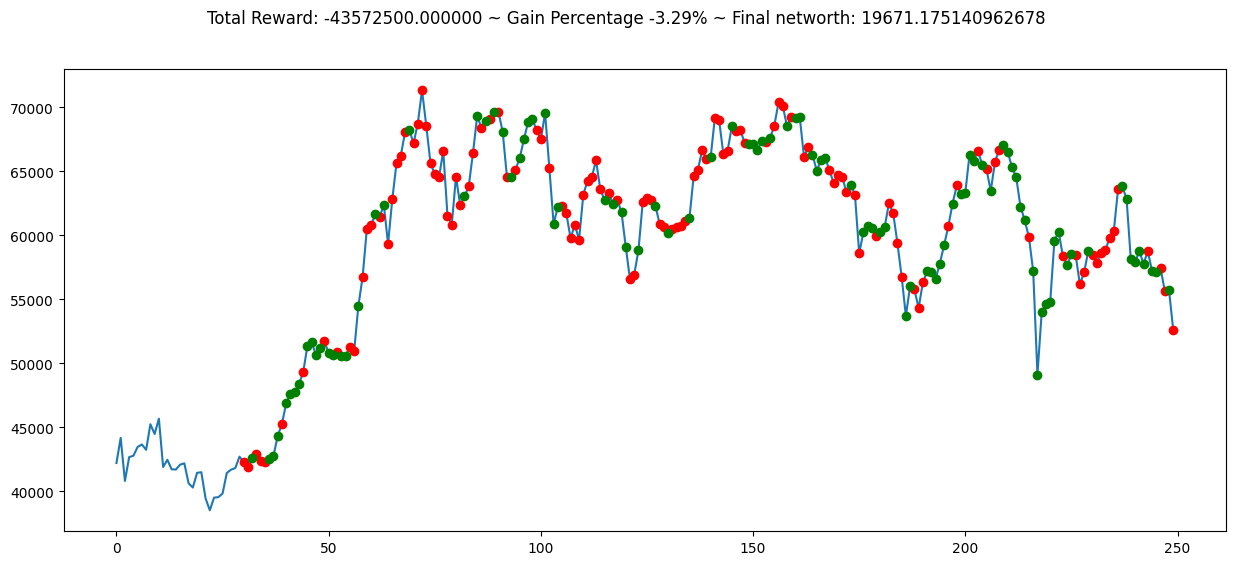

In [152]:
plt.figure(figsize=(15,6))
plt.cla()
test_env.render_all()
plt.show()

Average Profit: 1.1053
Minimum Profit: 0.4098
Maximum Profit: 3.1829
Standard Deviation of Profits: 0.4901


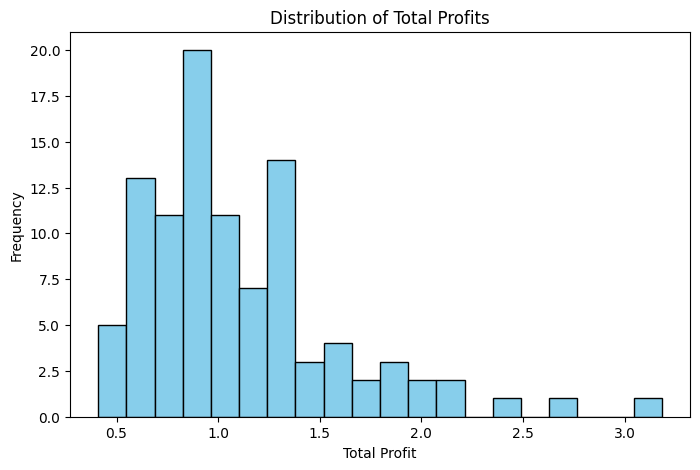

In [154]:
def analyze_profit_array(profits_array):
    """
    Analyzes an array of profits, converting it to a DataFrame and performing analysis.

    Args:
        profits_array (list or numpy.ndarray): Array of integer profits.
    """

    # Convert to numpy array if it's a list for easier handling
    profits_array = np.array(profits_array)

    # Create a DataFrame from the numpy array
    df = pd.DataFrame(profits_array, columns=['Total Profit'])


    # Calculate basic statistics
    average_profit = df['Total Profit'].mean()
    min_profit = df['Total Profit'].min()
    max_profit = df['Total Profit'].max()
    std_profit = df['Total Profit'].std()


    print(f"Average Profit: {average_profit:.4f}")
    print(f"Minimum Profit: {min_profit:.4f}")
    print(f"Maximum Profit: {max_profit:.4f}")
    print(f"Standard Deviation of Profits: {std_profit:.4f}")

    # Plot the distribution
    plt.figure(figsize=(8, 5))
    plt.hist(df['Total Profit'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Total Profits')
    plt.xlabel('Total Profit')
    plt.ylabel('Frequency')
    plt.show()
    

analyze_profit_array(test_envs_profit)